In [1]:
import pandas as pd

In [2]:
degree = pd.read_csv('F:/bulk_export_122020/degrees.csv')
organization = pd.read_csv('F:/bulk_export_122020/organizations.csv')
funding_round = pd.read_csv('F:/bulk_export_122020/funding_rounds.csv')
people = pd.read_csv('F:/bulk_export_122020/people.csv')
aqu = pd.read_csv('F:/bulk_export_122020/acquisitions.csv')
job = pd.read_csv('F:/bulk_export_122020/jobs.csv')


# Organization

In [21]:
org = pd.DataFrame(organization,columns=['uuid','status','category_groups_list','num_funding_rounds','total_funding_usd','founded_on','closed_on','employee_count'])
# org

##### 1. Chooose the company founded between 2013

In [22]:
# org = org.loc[ org.loc[:,'founded_on'] < '2017-01-01']
org = org.loc[ org.loc[:,'founded_on'] > '2011-01-01' ]
org

,uuid,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,closed_on,employee_count
241,231e0f6b-8bdf-28b0-a82c-b42bdec2c67d,acquired,"Consumer Electronics,Internet Services,Real Es...",NaN,NaN,2013-01-01,NaN,101-250
282,ed54b2d5-f2f1-d4e9-9bbe-40961ff08d44,acquired,"Apps,Design,Mobile,Professional Services,Software",5.0,58200000.0,2020-02-01,NaN,51-100
286,5d0cf18b-91bf-92a4-3cb6-62919c2fac08,operating,"Internet Services,Media and Entertainment,Soft...",NaN,NaN,2016-05-12,NaN,11-50
384,cf3a40e6-920e-edfd-569e-371f84e0a4e4,operating,"Financial Services,Health Care,Lending and Inv...",NaN,NaN,2015-01-01,NaN,101-250
405,5130c24d-d476-67e5-81f4-d706ab2c9ea4,operating,Education,NaN,NaN,2011-11-26,NaN,11-50
...,...,...,...,...,...,...,...,...
1216424,a64d3f29-f00d-4a60-9a61-b2f710bbfc19,operating,Community and Lifestyle,NaN,NaN,2020-03-01,NaN,1-10
1216426,e14386d9-2f49-4fd6-a8a7-e54b7f2c3380,operating,NaN,NaN,NaN,2020-12-14,NaN,1-10
1216432,78fc105f-432b-45ef-ab0e-c5a620778775,operating,Professional Services,NaN,NaN,2014-01-01,NaN,1-10
1216440,09c8e895-e62e-46f0-93f9-45e088ede007,operating,NaN,NaN,NaN,2020-09-08,NaN,unknown


##### 2. map
map status <br>
map employee_count<br>
calculate the age of organization<br>



In [23]:


# org = org.loc[org['num_funding_rounds'] < 4]

# org.loc[org['uuid'] == '231e0f6b-8bdf-28b0-a82c-b42bdec2c67d']['roles'].values
# org['is_company'] = org['roles'].map(lambda x:x.split(',')[0])
# org['is_investor'] = org['roles'].map(lambda x:x.split(',')[1])
# print(org['roles'].unique())
# org['roles'] = org['roles'].map({'company':0, 'investor':1, 'investor,company':2})

######! map the status #################
print(org.loc[:,'status'].unique())
org.loc[:, 'status'] = org.loc[:, 'status'].map({'acquired':1, 'operating':1, 'ipo':1,'closed':0})

####! map the employee_count ########
print(org['employee_count'].unique())
# org['employee_count'] = org['employee_count'].map({'101-250':3, '51-100':2, '11-50':1, '1-10':0, '5001-10000':7, '10000+':8,
#        'unknown':9, '251-500':4, '1001-5000':6, '501-1000':5})
org.loc[:, 'employee_count'] = org.loc[:, 'employee_count'].map({'101-250':1, '51-100':0, '11-50':0, '1-10':0, '5001-10000':2, '10000+':3,
       'unknown':4, '251-500':1, '1001-5000':2, '501-1000':1})

########calculate the years###################
# int('2021-01-01'.split('-')[0])
org['years'] = ''
org.loc[:, 'closed_on'] = org.loc[:, 'closed_on'].fillna('2021-01-01')
# org['founded_on'] = org.founded_on.apply(lambda x: int(x.split('-')[0]))
org.loc[:,'years'] = org.loc[:, 'closed_on'].apply(lambda x: int(x.split('-')[0])) - org.loc[:, 'founded_on'].apply(lambda x: int(x.split('-')[0]))


# org

['acquired' 'operating' 'closed' 'ipo']
['101-250' '51-100' '11-50' '1-10' '5001-10000' '10000+' 'unknown'
 '251-500' '1001-5000' '501-1000']


##### 3. Fill NaN  and  Drop NaN 

In [31]:
######## fill NaN of number of funding rounds #######################
org.loc[:, 'num_funding_rounds'] = org.loc[:, 'num_funding_rounds'].fillna(0)
org.loc[:, 'total_funding_usd'] = org.loc[:, 'total_funding_usd'].fillna(0)
print(org['total_funding_usd'].max())


22000000000.0


In [32]:
org.loc[(org['total_funding_usd'] == 0) & (org['num_funding_rounds'] == 0)]

,uuid,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,closed_on,employee_count,years
241,231e0f6b-8bdf-28b0-a82c-b42bdec2c67d,1,"Consumer Electronics,Internet Services,Real Es...",0.0,0.0,2013-01-01,2021-01-01,1,8
286,5d0cf18b-91bf-92a4-3cb6-62919c2fac08,1,"Internet Services,Media and Entertainment,Soft...",0.0,0.0,2016-05-12,2021-01-01,0,5
384,cf3a40e6-920e-edfd-569e-371f84e0a4e4,1,"Financial Services,Health Care,Lending and Inv...",0.0,0.0,2015-01-01,2021-01-01,1,6
405,5130c24d-d476-67e5-81f4-d706ab2c9ea4,1,Education,0.0,0.0,2011-11-26,2021-01-01,0,10
447,53dd44bb-3c5e-5563-c1e1-70355b0b6876,1,"Advertising,Data and Analytics,Other,Sales and...",0.0,0.0,2012-03-12,2021-01-01,0,9
...,...,...,...,...,...,...,...,...,...
1216424,a64d3f29-f00d-4a60-9a61-b2f710bbfc19,1,Community and Lifestyle,0.0,0.0,2020-03-01,2021-01-01,0,1
1216426,e14386d9-2f49-4fd6-a8a7-e54b7f2c3380,1,NaN,0.0,0.0,2020-12-14,2021-01-01,0,1
1216432,78fc105f-432b-45ef-ab0e-c5a620778775,1,Professional Services,0.0,0.0,2014-01-01,2021-01-01,0,7
1216440,09c8e895-e62e-46f0-93f9-45e088ede007,1,NaN,0.0,0.0,2020-09-08,2021-01-01,4,1


In [33]:
org = org.drop(columns=['founded_on','closed_on','employee_count'])
org = org.drop(org[org['num_funding_rounds']==0].index)
org = org.drop(org[org['total_funding_usd']==0].index)
org = org.dropna(subset=['category_groups_list'])
# org = org.loc[org.loc[:,'years'] <= 4]
org

,uuid,status,category_groups_list,num_funding_rounds,total_funding_usd,years
282,ed54b2d5-f2f1-d4e9-9bbe-40961ff08d44,1,"Apps,Design,Mobile,Professional Services,Software",5.0,5.820000e+07,1
506,354446ed-9a91-8613-b6f9-9da5decbea67,1,"Internet Services,Media and Entertainment,Musi...",1.0,1.500000e+04,1
834,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,"Artificial Intelligence,Commerce and Shopping,...",1.0,4.000000e+06,3
847,7e477b77-f410-0f96-07cf-cea2634f95cf,1,"Community and Lifestyle,Information Technology...",2.0,1.500000e+06,9
1179,74a20af3-f4dd-6188-de60-c4ee6cd0ca4a,1,"Commerce and Shopping,Financial Services,Inter...",4.0,2.200000e+10,7
...,...,...,...,...,...,...
1216240,ab278d7c-eb9f-4ed3-8c65-24b7685145a4,1,"Content and Publishing,Media and Entertainment...",1.0,2.500000e+05,3
1216278,e3baa88d-8592-40cc-8ff5-c40254b444e2,1,Health Care,1.0,3.130000e+06,2
1216302,03249b8e-ea2b-4839-a409-232f796f0e62,1,"Commerce and Shopping,Sales and Marketing,Soft...",3.0,4.765610e+05,3
1216335,e2760a4a-4645-4e09-a201-3f92807123be,1,"Biotechnology,Health Care,Science and Engineering",1.0,2.000000e+06,2


###### One-hot encoiding (Category_group)

In [34]:
org2 = org.drop(['category_groups_list'], axis=1).join(org['category_groups_list'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('category_list'))

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,6))
list_category = org2['category_list'].unique()
print(list_category)
# org2['category_list'].value_counts().plot.bar()

['Apps' 'Design' 'Mobile' 'Professional Services' 'Software'
 'Internet Services' 'Media and Entertainment' 'Music and Audio'
 'Artificial Intelligence' 'Commerce and Shopping' 'Data and Analytics'
 'Science and Engineering' 'Community and Lifestyle'
 'Information Technology' 'Messaging and Telecommunications' 'Platforms'
 'Financial Services' 'Lending and Investments' 'Payments'
 'Administrative Services' 'Other' 'Consumer Electronics'
 'Government and Military' 'Hardware' 'Privacy and Security'
 'Food and Beverage' 'Sales and Marketing' 'Transportation'
 'Clothing and Apparel' 'Content and Publishing' 'Education'
 'Manufacturing' 'Gaming' 'Health Care' 'Events' 'Advertising'
 'Real Estate' 'Travel and Tourism' 'Video' 'Navigation and Mapping'
 'Sports' 'Energy' 'Sustainability' 'Agriculture and Farming'
 'Consumer Goods' 'Biotechnology' 'Natural Resources']


In [35]:
### category ## one hot encoding #########

x = org.category_groups_list.str.split(r',', expand=True).stack().reset_index(level=1, drop=True).to_frame('category_list')
final = pd.get_dummies(x, prefix='categ_1_hot', columns=['category_list']).groupby(level=0).sum()
final
org3 = org.join(final)
org3 = org3.drop(columns=['category_groups_list'])
org3

,uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,categ_1_hot_Professional Services,categ_1_hot_Real Estate,categ_1_hot_Sales and Marketing,categ_1_hot_Science and Engineering,categ_1_hot_Software,categ_1_hot_Sports,categ_1_hot_Sustainability,categ_1_hot_Transportation,categ_1_hot_Travel and Tourism,categ_1_hot_Video
282,ed54b2d5-f2f1-d4e9-9bbe-40961ff08d44,1,5.0,5.820000e+07,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
506,354446ed-9a91-8613-b6f9-9da5decbea67,1,1.0,1.500000e+04,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
834,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,1.0,4.000000e+06,3,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
847,7e477b77-f410-0f96-07cf-cea2634f95cf,1,2.0,1.500000e+06,9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1179,74a20af3-f4dd-6188-de60-c4ee6cd0ca4a,1,4.0,2.200000e+10,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216240,ab278d7c-eb9f-4ed3-8c65-24b7685145a4,1,1.0,2.500000e+05,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1216278,e3baa88d-8592-40cc-8ff5-c40254b444e2,1,1.0,3.130000e+06,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1216302,03249b8e-ea2b-4839-a409-232f796f0e62,1,3.0,4.765610e+05,3,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1216335,e2760a4a-4645-4e09-a201-3f92807123be,1,1.0,2.000000e+06,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


###### One-hot encoding  (total_funding_usd)


In [10]:

# org2 = org.loc[:, ['status','total_funding_usd','employee_count']] 

# one_hot_em = pd.get_dummies(org3['employee_count'])
# one_hot_em.columns = ['nan','employee_count_1hot_100','employee_count_1hot_1000','employee_count_1hot_10000']
# org3 = org3.join(one_hot_em)

def my_cut(x):
    if 0 <= x < 1000000 :
        return 1
    if 1000000 <= x < 10000000:
        return 2
    if 10000000 <= x < 100000000:
        return 3
    else:
        return 4
org3.loc[:, 'total_funding_usd'] = org3.loc[:, 'total_funding_usd'].map(my_cut)
one_hot_fu = pd.get_dummies(org3['total_funding_usd'])
one_hot_fu.columns = ['total_funding_1hot_100','total_funding_1hot_1000','total_funding_1hot_10000','total_funding_1hot_l_10000']
org3 = org3.join(one_hot_fu)
# org3 = org3.drop(columns=['total_funding_usd','employee_count'])
org3 
# org2.to_csv('data_v1.csv',index=False)

,uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,categ_1_hot_Software,categ_1_hot_Sports,categ_1_hot_Sustainability,categ_1_hot_Transportation,categ_1_hot_Travel and Tourism,categ_1_hot_Video,total_funding_1hot_100,total_funding_1hot_1000,total_funding_1hot_10000,total_funding_1hot_l_10000
2257,68d93885-34e6-3967-786d-35b8be4df50f,1,2.0,1,5,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2290,82a742c6-8eac-5586-7d7f-654f0d8bb99b,1,2.0,2,8,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3222,1dda9b2b-aa5c-5553-3690-782df23270fe,1,2.0,1,7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3629,6a42b58a-5416-8e46-efe5-2cd0b9ff6be7,0,1.0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4040,96693632-e59c-1534-8049-b13502eecb36,1,1.0,1,8,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214658,ddb1b8df-c343-4a19-97d1-b934fc313ba0,1,2.0,1,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1214946,78786bbb-acc6-4188-a6c4-80900dcb2f2f,1,1.0,2,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1215259,bd863f45-f219-4876-be4f-f7c10ee3affa,1,2.0,1,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1215598,376ffdcc-c2c7-4d75-9144-2e1b8047b927,1,1.0,3,7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# funding

In [36]:
fr = pd.DataFrame(funding_round,columns=['uuid','investment_type','raised_amount_usd','investor_count','org_uuid'])
fr[(fr['org_uuid'] == '00002470-bff7-6226-5800-0ca1b3787b6f')]
# org3[(org3['uuid'] == '00002470-bff7-6226-5800-0ca1b3787b6f')]
# fr.investment_type.unique()
# fr

,uuid,investment_type,raised_amount_usd,investor_count,org_uuid
37536,68aa5f2f-e8cb-48d1-3eb0-e4e14e2bc297,seed,NaN,3.0,00002470-bff7-6226-5800-0ca1b3787b6f
58120,bbbf009a-a6da-a230-4a17-120817603c20,seed,600000.0,5.0,00002470-bff7-6226-5800-0ca1b3787b6f
98710,a460600d-b8c9-35b5-47e0-78692078fe71,seed,1200000.0,4.0,00002470-bff7-6226-5800-0ca1b3787b6f
104098,8b8cfe2c-cfa0-bb7f-d9e4-dbe1cf88a9b9,series_unknown,NaN,2.0,00002470-bff7-6226-5800-0ca1b3787b6f
144479,e2bc8d8c-7196-0017-3064-60d8b2c80b24,seed,1600000.0,1.0,00002470-bff7-6226-5800-0ca1b3787b6f


##### Merge the investment_type to the organization

In [37]:
data1 = fr.groupby(by='org_uuid').apply(lambda x: ','.join(x['investment_type'])).to_frame()
# data1
data1['uuid'] = data1.index
data1['investment_type'] = data1.iloc[:,0]
data1= data1.drop(data1.columns[0], axis=1)
# data1
# x = data1.investment_type.str.split(r',', expand=True)
# .stack().reset_index(level=1, drop=True).to_frame('in_type')
# final = pd.get_dummies(x, prefix='categ_1_hot', columns=['category_list']).groupby(level=0).sum()
# final
# org3 = org.join(final)
# data2 = fr[(fr['investment_type'] == 'series_a')]
# org3 = org3.rename(columns={"org_uuid": "uuid"})
org_fr = pd.merge(org3, data1, on="uuid", how='left')



##### Search the organization before series C

In [38]:
# org_fr = org_fr.drop(org_fr[ set(org_fr['investment_type']) <= set(['seed','series_a','series_b','angel']) ].index)
list1 = org_fr['investment_type'].tolist()
# list1
for i in list1:
    list_i = i.split(',')
    if(set(list_i) <= set(['seed','series_a','series_b','angel'])):
        print(i)
    else:
#         print('not in',i)
        org_fr = org_fr.drop(org_fr[org_fr['investment_type'] == i ].index)

seed
seed
seed,seed
seed
seed
series_a
seed
seed,series_a,series_a,series_b,series_b
seed
seed,seed
seed
series_a,series_b,seed,series_a,series_b
seed
seed
seed,seed
seed,seed
seed,seed,seed
series_a,series_b
angel
seed
series_a,seed
angel,seed
seed
seed
seed,seed
series_a
series_b,series_b
seed,seed
seed,series_a,series_b
seed,seed
angel
seed
seed
seed
seed
seed
seed
series_a,series_b
series_a
seed
series_a,seed
seed
seed,seed
series_a,series_a,series_a
series_a,series_b
seed
series_a,seed
angel
seed
seed,seed,seed,series_a
series_a,seed,seed
angel
seed
seed
seed
seed,seed,seed
series_a
seed
seed
seed
series_a,series_a
seed,seed
seed
seed
seed,series_a,series_a,series_a
seed,seed,seed,series_a,series_a
seed,series_a,series_b
seed,angel
seed,angel
seed
seed
seed,series_a
seed
seed,series_a,series_a
seed
seed
seed
seed,series_a,series_b
seed
seed
series_a
seed,series_a
series_a,series_a,series_b,series_b
angel,angel,seed
seed
seed,seed,seed
angel,series_a,seed,series_b
seed,series_a,see

seed
seed
seed
angel,angel
angel,seed
seed,seed
seed,series_a,series_a,series_a
seed,seed,series_a,series_b
seed,seed,seed,seed,seed
seed,seed,seed,seed
seed
seed,series_a,series_a
seed
seed,series_a
series_b,series_a
seed,series_a
seed
seed
seed,angel
seed
seed,seed,seed,series_a
seed,seed
seed
seed,seed
seed,seed,seed
seed,seed
seed,series_a
series_a
seed
angel,seed,series_a
angel,seed
series_a
seed
seed,seed
seed,seed
seed
seed
seed,seed,series_a
seed,seed,seed,series_a,seed,series_b
seed
seed
series_a
seed
seed
seed,seed,seed
seed
seed
angel
seed
seed
seed,seed,seed
seed
seed
seed,seed
seed,seed,angel,seed,angel,angel
seed
seed
seed,seed
seed
angel,seed,seed,seed
seed,seed,angel,series_a,series_b
seed,seed,seed,series_a
seed
angel,seed
seed,seed,seed
seed
seed
seed
seed,series_a
seed
seed
series_a,seed
seed,series_a
seed
seed
seed
seed,seed,series_a,series_a
seed
seed
seed,seed
angel
seed
seed,seed,series_a,series_b,series_a,series_a
seed
seed
seed,series_a,series_a
seed
angel,ange

seed
seed
seed
angel
seed
seed,seed
seed
seed
seed,seed
seed,angel,seed
angel
seed
seed,seed
seed
seed,angel,series_a
seed,series_a
seed
angel
seed
seed
seed
angel,seed
angel
seed,seed
seed
seed
seed
angel,seed
seed
seed
series_a,series_a
angel
angel
seed
seed
seed
seed,series_a
seed
seed
seed,seed
seed
seed,series_a,series_b
series_a
seed
series_a,series_b
seed,seed
seed
seed
seed,seed,seed
series_a,series_b
angel
seed,series_a
seed,angel
seed
seed,series_a
seed
seed,seed
seed,seed
seed
seed
seed,seed,series_a,series_b
seed,angel
seed
series_a
seed
seed
seed
series_a,series_b
seed
angel
seed
seed,angel
seed
seed,seed
series_a
seed,seed,series_a
seed
seed,seed,seed,seed
seed,seed
seed
angel,seed
seed
seed
seed
seed,seed
seed,seed,seed
seed
seed
seed
seed,seed
seed,seed
seed,seed,seed,seed
seed
seed
seed
seed,seed
seed
angel,seed
seed
seed,seed,seed,seed
seed,seed
seed,seed
angel,seed
angel,seed
seed
seed
seed,seed
angel
angel
seed,seed
seed,seed
seed,seed,seed
seed,seed,series_a,series

seed
seed,seed,seed,seed
seed,seed,seed
seed
seed
seed
seed
seed
angel
series_a,seed,seed
series_a,series_b,series_b
seed
angel,angel
seed
seed
seed,seed,seed,seed,seed
seed
seed,series_a
seed
seed
seed
seed
seed
seed
seed
angel,angel,seed,seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
seed,seed,seed,series_a
seed,seed
series_a
seed
series_a
seed
seed
seed
series_a
seed,seed,seed
seed
seed
seed
seed
seed
seed
seed,seed
seed,series_a
series_a,seed
seed,seed
seed,seed,seed
seed
seed,series_a,series_a,series_b,series_a
series_a,series_b
seed
seed
angel
seed,seed
angel
seed
angel,series_a
seed,angel
seed
seed
seed,seed
seed,seed
seed
seed,seed,seed
seed
seed,seed,seed,seed,series_a,series_b
seed,seed
angel
seed,series_a
seed,seed
seed,seed
seed
seed
seed
seed
seed
angel
seed,seed,seed,seed
seed,angel
seed
seed,series_a
seed
series_a
seed,seed
seed,seed
seed,series_a
seed,seed,seed,angel
seed
seed
seed
seed,seed
seed,seed,seed,seed,seed
seed
seed
seed,seed,seed,seed
seed,series_a
an

seed
seed,seed
seed,seed
seed
angel
angel,angel
angel,seed,angel
series_a
seed,seed,seed,series_a
seed
seed,seed,seed
seed,series_a
seed
seed
seed,seed
seed
series_a
angel,seed
seed
seed
seed,seed
seed,seed,seed
series_b,series_a,seed
seed,angel,series_a,series_a,seed
seed
angel,seed,seed,seed
seed
seed
seed,series_a,seed
seed,seed
seed
seed
seed
seed,seed
angel
seed,seed,seed
seed
seed
seed
seed
seed
seed,series_a
seed
seed
seed,seed
seed,angel,seed
seed,seed
seed
seed
seed
seed,seed
seed
angel,seed
seed
seed
seed
seed
seed
angel
series_a,seed,series_b
series_a
seed
seed
seed,angel,seed,angel,seed,seed
seed
seed,seed
seed,seed,seed
series_a,series_a,series_b,series_a,series_a,series_b,series_b
angel
seed
angel,angel
seed,series_a
seed
seed
seed,seed,seed
seed
seed,angel,seed,seed,seed
seed,seed
seed,series_a
series_a
angel,angel
seed,seed
seed,seed,seed
seed
seed,seed,series_a,series_b
seed
seed,series_a,seed
seed,seed
seed
seed
seed
seed
angel,series_a
seed
angel,seed
seed
seed
seed,

seed
seed
seed
series_a
seed
angel,series_a,series_a
seed
seed
seed
angel,series_a,series_a
seed
angel,seed,series_a,series_b
seed
seed,seed,seed
seed
series_a,angel
seed
seed
angel
angel,series_a
seed
seed,seed,seed
seed,seed,seed,series_a
seed,seed,seed,seed,seed
series_a,series_b
seed
seed,seed
angel
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed
seed,series_a
seed
seed
angel,seed
seed
seed
angel
seed,seed
seed
seed
seed,seed
seed,seed,seed
seed
seed,seed,seed,seed
seed
seed
seed
seed
series_a,seed
angel
seed,series_a
seed,seed
series_a,series_a,series_b,series_b
seed
seed
series_a
seed,angel
seed
seed,seed
seed
seed,seed
seed,seed
seed,angel
series_a,series_b
angel
series_a,series_b,angel
angel,seed
seed,angel,seed,seed
seed
seed
seed,series_a,seed,seed
seed,seed
seed
seed
series_a
seed
seed,seed
seed
seed
seed
angel,seed,seed
seed
seed
seed,seed,series_a
series_a,series_a
seed
seed,seed
series_a
seed
seed,seed,seed
seed
seed,seed
seed
seed
seed
seed,series_a,series_b
seed
angel

seed
seed
seed
seed
seed,seed
angel
seed
seed,seed
seed
seed
angel
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
angel
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_b,series_a,series_b
seed
seed,seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed,seed
angel
seed
seed,series_a
seed
seed
seed
seed,seed
seed,seed
seed
seed,seed,seed,series_a,seed
seed
seed
seed
seed,seed
seed
angel
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
angel
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed,seed
seed
series_a
seed
angel,angel
seed
seed
seed,series_a
seed
seed
seed
seed
seed
seed,seed
seed,series_a
seed,seed,seed,seed
seed
seed
seed,seed
angel
angel
seed
seed,series_a
seed
seed
seed,seed
seed,series_b,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed
angel,seed
seed
seed
seed
seed,seed
seed
seed


series_a,series_b
seed,seed
series_b,series_a
seed,seed,seed,series_a,series_a
seed,seed
seed,seed,seed,seed,seed
seed
seed,series_a,series_b
series_a
seed
seed,seed
seed
seed
series_a
seed
seed
seed
seed
seed
seed
angel
seed,series_a,series_a
angel,seed
seed,seed,seed,seed
seed,seed,seed
seed
seed,series_a
seed
seed
seed
seed
seed,seed
series_a,series_b
series_a
seed
seed
seed
series_a,seed,seed,series_a
seed
seed,series_a
seed,series_a,series_b,series_b,series_a
angel
angel,seed,seed
seed
seed,seed
seed,seed,seed,seed,seed
seed
seed
seed,seed,seed
seed
series_a,seed,series_b
seed
seed
seed
angel
seed
seed,seed
seed,seed
seed,seed
seed,series_a
seed
angel
seed,series_a
seed,series_a
angel,seed
series_a,series_b
seed
seed,seed,seed
seed,seed
seed
seed,series_a
seed
seed
seed
seed,seed
seed,seed,angel
seed,seed,series_a
seed,series_a,series_b
seed,seed
seed,seed,seed,series_a,seed
seed,seed
seed
angel,angel,angel
seed
seed
angel
seed
seed,angel
angel,angel
seed,seed
series_a,series_b
se

angel,seed
seed,seed
seed
seed
angel
seed
seed,seed,seed
series_a
seed
seed
seed,seed
series_a,series_b
seed,seed,seed
angel
seed,series_a
seed,seed
seed,seed,seed
seed
seed
seed,seed
seed
seed,seed,seed,seed
seed
seed
seed,series_a
series_a
angel,seed,series_a,series_b
seed
seed,seed
seed
seed
angel
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
series_a,series_a
seed
seed,series_a,series_a,series_b
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a,series_b
seed
seed
angel
seed,series_a,series_b
seed,seed
seed,seed
seed,seed,series_a,seed,series_b
seed,seed,seed
seed,series_a,series_b
seed
seed,seed,seed,seed,seed
seed
seed,series_a
seed,angel
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a,series_a
seed,seed,series_a,series_b
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,angel,series_a,series_b
seed,seed
seed
seed
seed
seed
seed,seed
seed,seed,series_a
seed
angel,angel,seed
seed,seed,seed,series_a
seed


seed
seed,seed,seed
seed
seed
seed
seed
seed,seed
series_a
seed
seed,seed
seed,seed
seed,seed,seed
seed,series_a
seed
seed
seed
seed
seed,seed
seed
seed,seed
angel
angel
seed
seed
series_a,series_a,series_a
series_a
series_b
seed,seed
seed,seed
seed
seed
seed
angel
seed
angel
seed
seed
angel,seed
seed,seed,seed,seed
series_a
seed
seed,seed,seed
seed,seed
seed
angel
seed
seed
seed
seed
angel,seed
seed
seed,seed
series_a,seed,series_a
seed
seed
seed
seed,seed
seed
seed
seed,seed
seed
seed
seed,series_a
seed
seed
seed
seed,seed,seed
angel,seed,seed,seed,seed,seed,seed
seed
angel
seed
seed,angel,series_a
seed
seed,seed,seed
seed
series_b,seed,series_a
seed
angel
series_a
seed
angel
seed
seed
seed
seed
series_a
seed
seed
seed
series_a,series_a,series_a,seed,series_b
seed
seed
seed,seed
series_a,series_b
seed
seed
seed
seed,seed,series_a
seed,seed,angel,seed
angel
series_a,series_b,series_b
seed,seed
seed,seed
seed,series_a,series_a,series_b
seed,seed
seed
series_a
series_a,seed
seed
seed
se

seed
seed
seed
angel,seed
seed
seed
series_b
angel,angel
seed
series_a
seed,angel
seed
angel,seed
seed
seed
angel,seed
series_b
series_a
seed
series_b,seed,series_a
series_a,series_a
seed
seed
seed,angel
seed,seed,series_a
seed
seed
angel,seed,angel,seed,series_a,series_a,series_a
seed
seed
seed,seed
series_a
seed
seed,seed
angel
seed
seed,series_a,seed
seed,seed
seed
seed
seed
series_a
seed
seed,seed,series_a
seed,angel,series_a
seed
seed
seed,angel
seed
seed,series_a,series_b
seed
angel
seed
series_a
seed
seed
seed,seed,seed
seed
seed
seed
seed,seed,series_a
series_a,angel
seed
seed,seed
seed,seed,seed
seed,seed
seed,seed
seed
series_a,seed,series_b
seed
seed
angel
seed,seed,seed
seed
seed
seed
seed
angel
seed,angel
seed
seed
seed
seed,seed
series_a,series_b
seed,seed,seed,seed,seed,seed,seed,angel,seed,seed,seed,seed,seed
seed
seed,seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
series_a,series_b
seed
seed,series_a
seed,angel
seed
seed,series_a
seed
seed
angel,angel,seed,seed
ange

seed
seed
seed,seed,seed,series_a
series_a,seed,series_a
seed
seed,seed
seed
seed
seed,seed
series_a
seed,seed,seed,seed
seed
seed,series_a
series_a
seed
seed
seed
seed
seed
seed
seed,angel
series_a
series_a
seed
seed
angel,seed,seed
seed,seed
seed,series_a
seed
seed
angel,seed
angel,angel,seed
seed
seed,seed,series_a,series_b
seed,seed,seed,series_a
seed
angel
seed
angel,seed,seed
seed,angel,seed
seed
seed,seed
seed,series_a
seed,seed,series_a
seed
angel,angel,angel
seed,seed
seed,seed
seed,series_a
seed,seed
seed
seed
seed
seed,seed
angel,seed
seed,seed
seed,seed,seed
seed,seed,seed
seed
seed,seed,seed
series_a,seed,series_a,series_b
seed
seed,seed
seed,seed
seed,seed,seed,seed,seed
seed
seed
series_a
seed,seed
seed,seed
angel,angel,angel,angel
seed
seed,seed
seed,angel,seed
angel
seed
seed
seed
seed
series_b,seed,series_a,seed,series_b
seed
seed
seed,seed
seed,seed
seed
angel
seed,seed
seed
seed,seed,seed,seed,seed
seed
seed
seed,seed,seed,seed
seed
seed,seed,seed
seed
seed
seed
see

seed,seed,seed,seed,angel
angel
angel
seed
seed,seed
seed
seed
angel
seed
seed
seed
seed
seed,angel,angel,seed,angel,angel
angel
series_a
seed,angel
series_a
seed
angel,series_a,angel
seed
seed
seed
seed,seed,seed,series_a
seed,seed
seed
series_a
seed
seed
angel,seed,seed
seed
seed,series_a
seed
seed
seed
seed
angel
seed,seed,seed
seed
seed
series_a
seed
series_b,series_a
seed,seed
seed,seed
seed
seed,seed
seed
seed
angel
seed
seed
seed
seed,series_a,seed,seed
seed
angel
angel,seed
seed,seed
series_a,series_b
seed,angel,angel,angel
seed
seed
seed
seed,series_a
seed,seed
seed,seed,series_a
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed,seed
angel,seed,angel,angel,angel,series_a,series_a
seed,seed,seed
angel,seed,seed
seed
seed
angel,seed,series_a
seed
series_a,series_b,series_b,series_b
series_a,seed,seed,seed,series_a
seed,angel
seed,series_a,series_b
seed
seed
series_a
seed,seed,series_a
seed
seed
seed,series_a
seed
seed
seed
seed
angel,seed,seed,seed
seed
seed,series_a,series_b
se

seed,seed
seed,seed,series_a
series_a,series_a,series_a
series_a,series_a
series_a
seed
seed
seed
angel
seed,seed,seed,series_a
seed
angel
series_a,series_b
seed
series_b
seed
series_a,series_b,series_b
seed
angel
seed
seed
seed
seed
angel
seed
series_a
angel
seed
seed
seed
seed,seed,series_a,series_a,series_b
angel,seed,angel
seed,seed,series_a
seed,series_a,seed
angel,seed,series_a
seed
seed
seed
seed
seed
seed,seed,seed
angel
seed
seed,series_a,seed
seed
seed,seed
seed
seed,seed,seed
seed,series_a,series_b
seed
seed
seed
seed
seed,seed
seed,seed,seed
seed
seed
seed
seed,seed,seed,seed,seed
seed,seed,series_a
seed,seed
seed,series_a,seed
seed,seed,seed
seed
seed,series_a
angel,series_a
angel,series_a
seed,seed
angel
seed
seed
angel
angel,seed
seed
angel
seed
seed,series_a
seed,series_a,seed,seed
angel
seed
seed,series_a,series_b
seed,seed
seed
seed
seed,seed,seed,series_a,series_a
seed,series_a,series_b
seed,seed
seed,angel
angel
series_b,series_a
seed
seed,seed
series_a,seed,series_

seed
seed
series_a,series_a,series_b
seed
seed
seed
seed,seed
seed
seed
series_b,series_a
seed,seed
seed,seed,series_a
seed
seed
seed
seed,seed
seed
seed,seed
seed
seed
series_a
series_a,series_b
series_a
series_a
seed,series_b,seed
seed
seed,seed
series_a,series_b,series_b
seed
angel
seed,seed,seed
series_a,series_b,seed
seed
seed,seed,seed
seed
seed,series_a
angel
series_a
seed,seed,seed
seed
seed,seed,angel
seed
seed
series_a
series_a
seed
seed,seed,series_a,seed,seed
seed,angel
seed
seed,seed
seed
seed
seed,seed,series_a,series_b,series_b,seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed,series_a
seed,series_a
seed,angel,seed
seed,seed,seed
seed,angel
seed
seed
seed
seed,seed,seed
angel,angel,seed,seed
seed,seed,series_a
series_a
series_a
seed
seed
seed,seed,seed
series_a,series_b
seed
angel
series_a,seed
series_a
angel,series_a
seed,series_a
seed,seed,seed,series_a,series_b
seed,seed,seed
seed
seed,series_a,seed
series_a,series_a,seed,series_a
series_a
series_a,series_b
seed,

series_a
seed
seed
seed,seed
seed
seed
angel,seed
seed,seed
seed,series_a,seed
seed,seed
seed,series_a
seed
angel
seed
seed
seed
series_a
angel
seed,seed
angel,angel,angel,angel,seed
seed,angel
angel,angel
angel
seed
angel,seed
seed,seed
seed
series_a
seed
angel
seed,seed,seed
seed
seed,seed
seed
seed,seed,seed,seed
seed,seed,seed,series_a
seed
seed
angel
seed,series_a,series_a,angel,seed
series_a
seed
angel
seed
seed
seed
series_a,series_a
angel,seed,seed
seed
angel,seed,seed,seed
seed
seed
seed
seed,seed,seed
angel
seed,series_a,seed
series_a,series_b
seed,seed
series_a,series_b
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed,seed,series_a,series_b,seed
seed
seed
seed
seed,seed
seed
seed
seed
angel,series_a
seed
seed
seed
seed
seed
seed
seed
angel
seed
series_a,angel,angel
series_a,series_b,series_b
seed
seed,seed
seed
angel,series_a,series_a
seed
seed
angel,angel
series_b,series_a
seed
seed
seed,angel
seed
seed,seed
seed
seed,angel
angel
seed
seed,seed
seed,seed
series_a,ange

seed,angel
angel
seed
seed
seed
seed
seed
seed,seed,series_a
seed,seed
series_a
seed,angel,seed
seed
seed,series_a,seed,series_b
series_a
angel
seed
seed,angel,angel
seed
seed,series_a
angel
series_a,series_b,series_a
seed,seed
angel,seed
seed
seed
series_b,series_b
seed
angel
seed
seed
seed
seed,series_a,series_a,series_a,series_b
seed
series_a,series_b
seed,seed
seed
seed
seed
seed,seed,seed,seed
seed,seed
angel
seed,seed,seed,seed
seed,seed
seed
seed
seed,angel
series_a,series_b
seed
seed,seed
angel,angel,angel,seed
seed
seed,seed
seed
seed,seed
seed,seed
seed,seed
series_a
seed,series_a,series_b
seed
seed
seed
seed
series_a,seed
seed
seed
seed
seed,seed,seed
seed
series_b,series_a
series_a
seed,series_a
seed
seed
seed,seed
seed,seed,seed
seed
series_a
seed
seed
seed,seed
seed,seed
series_a,seed
seed
angel,series_a
seed
angel
seed,series_a,series_a
series_a,seed
seed
seed
seed,series_a
seed
angel,angel,seed
angel,seed
seed,seed,seed
seed
seed,seed
seed
seed,series_a,series_a
seed,se

seed
seed,seed
seed
seed,seed,seed,series_a
angel
seed,seed,series_a
series_a
angel
angel
seed
series_a
seed
seed
seed
seed
seed
series_a,seed
seed
seed
seed
seed
angel
seed
seed
seed,series_a
seed
seed
seed
seed
seed,seed
series_a,series_b
seed
angel,seed,seed,seed
seed,seed,series_a
angel,seed,series_a,series_a
seed,seed
seed
seed
series_a
seed,angel
seed,seed
seed
seed
seed,angel,angel,seed
seed
seed
seed
seed
seed
seed,seed,angel
series_a,series_a,series_b
seed
seed,seed,seed,series_a
seed,seed
seed,series_a,seed,series_a,seed,seed
seed
seed,seed
seed
seed,seed
seed
seed
seed
angel
seed,seed,series_a,series_b
seed,seed
seed,series_a
angel
seed
seed
series_a,series_b,series_b
seed,seed
angel
seed
seed,seed,seed
seed,seed
seed
seed
seed
angel,seed,seed,seed
seed,series_a,series_b
seed,seed,series_a
series_a
series_a
seed
series_a,seed,series_b
seed
series_a,series_b
seed
seed
series_a,series_a
seed
series_a
seed
seed,series_a,series_b,seed,series_b
seed,seed,seed,series_a,angel
seed


seed,seed,seed
series_a,seed
seed,series_a,series_b
angel
series_a
seed
seed
angel
series_a,series_a
angel
seed
angel
seed
series_a
seed
seed,seed
seed,series_a
seed,series_a
angel
series_b,series_a
angel
series_a,angel
angel,series_a
series_a,seed
seed,seed,series_a
seed
series_b,series_a
series_a
seed,seed
seed
seed
seed
angel,seed
seed
seed
seed
seed
series_a,series_b
seed
angel
seed,seed
seed
seed
seed,seed,seed,seed,seed
seed
seed
seed
seed
seed,seed
seed
series_a
series_a,seed,series_b
seed,seed
angel,seed
series_a,series_b,series_b
angel
angel,series_a,series_a
seed,seed,seed,seed
seed
seed
seed,seed,seed
seed
seed,seed
seed,series_a
seed,seed,seed,seed,seed,seed,seed,seed
series_a,series_b
angel
series_a
angel
seed,series_b
seed,angel,angel
seed
seed
seed
angel,series_b
seed,series_a
seed
series_a,series_a,series_b
series_a,series_b
seed,seed,seed
angel
seed,seed,series_a,series_b,series_b
angel
seed,seed
seed
seed
seed
seed,seed,seed,seed,seed
angel
seed
angel
angel,seed,serie

seed,seed
seed
seed,series_a,series_b
seed,seed,seed
seed,series_a
angel,seed
seed
seed
seed
seed,seed
seed
seed,seed
seed
seed
seed
seed
seed,seed
seed,series_a
seed
angel,seed,seed,seed,seed
seed
seed,seed
series_a
seed,seed
seed,seed
series_a
series_a,seed,series_b,series_b
seed
seed,series_a,seed,series_b
seed,seed
seed
seed,series_a
angel,seed
seed
seed
series_a
angel,seed,angel
series_a
angel,angel
seed,angel,seed,series_a
seed,seed,series_a,series_b,seed
seed
seed
seed,seed
series_a,series_b
seed,seed
angel
seed
seed
seed
seed,seed,series_a
angel,seed
seed
seed
series_a,seed,series_b
seed,seed
seed
seed,seed,seed,seed
seed,series_a
seed,seed,seed
seed,series_a,seed
seed,angel
seed,seed
seed
seed,angel,seed,seed,seed,seed
seed
seed,seed
seed
seed
seed,seed
seed
angel
seed,seed
seed
seed,angel
seed
seed,angel
seed,seed,seed
angel
seed
seed,series_a,series_b
seed
seed,seed
seed
seed,series_a,series_b
seed,angel
seed
seed
series_a
series_a,series_b,series_b
seed
angel
seed,seed,seed

seed,seed
seed
series_a
angel
series_a,series_b
seed,seed,series_a,series_a
seed,seed,seed
seed
series_a
seed
seed
seed
angel,angel
seed
series_a,series_a
angel
seed
seed,series_a
series_a
seed
angel,series_a
seed,seed,seed,seed
seed
seed
seed
seed,seed
seed
seed
seed,series_a,series_b
seed
seed,seed
series_a
seed
seed
seed
seed
seed,seed,seed
seed
seed,seed
seed,series_a,series_b
seed,series_b,series_a
series_a
seed
seed
seed
series_a,series_b,seed
seed
seed
seed,seed,seed
seed,seed
seed,seed
series_a
angel
seed
seed
seed
seed,seed
seed,seed,seed
seed
seed,seed
seed,seed,seed
seed
seed,seed
angel
angel
seed,series_a,series_a
series_b,series_b
seed,seed,seed
seed
angel
series_a,seed
seed
seed
angel,series_a,series_a
seed,series_a
seed,seed
seed,seed,seed,series_a
series_a
series_b,series_a,series_b
series_a
seed
angel,seed
angel
series_a,series_b
seed,seed,seed,seed,seed
seed
angel,seed,series_a,series_b
seed
seed
seed
seed,seed
seed
seed,series_a
seed
angel,seed,seed
angel,seed
angel,

series_a,series_b
seed,seed
seed,seed,seed
seed
seed
seed,seed
seed,seed,seed
seed,series_a
series_a,series_b
seed,seed
seed,series_a
seed
seed
seed
seed,seed
seed
seed
seed,seed
angel
seed,series_a
seed
seed,angel
seed
seed
seed,angel
series_a,series_b
seed
seed
series_a
seed,series_a
seed
seed
seed
seed
seed
seed
series_a
series_a
seed,series_a
series_a,series_b
seed,seed,seed
seed
seed
seed
seed,seed
seed,series_a,series_b
seed,series_a
seed,series_a
series_a
seed,seed,seed
seed
seed,seed
seed,seed
series_a,series_b
seed,series_a
seed
seed
seed
series_a
seed
seed
series_a
series_a
seed
seed
seed
seed
seed
seed
seed
seed
angel,series_a
seed,seed,series_a,series_a
seed
series_a,seed
seed,seed
seed,series_a
seed
seed,seed
seed
angel,seed,seed
seed
seed
series_a
series_b,series_a,series_b
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a
series_a,series_a,series_b
seed,seed
seed,seed
angel,angel
seed,series_b
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed,

seed
seed,seed,series_a
seed
series_b,series_a,angel
angel
series_a
seed,seed,seed,seed,seed
series_a
seed
seed
seed
seed
seed
seed
seed,seed,seed,seed
seed,seed
seed,seed
seed
seed
series_a,series_a,series_a
seed,series_a,series_b
seed
seed,series_a,series_b
seed
seed,series_a
seed
seed,series_a
seed,series_a,seed
angel
seed
series_a
series_a,series_b
seed,seed
seed,seed
angel
seed
seed,seed
series_a
series_b,series_a
seed
seed
seed
seed,seed
seed
seed
series_a
seed
seed
seed,seed
seed
angel,seed
seed,seed,seed
seed,seed
seed
series_a,seed
seed
seed
seed,seed
series_a
seed
series_a,seed,series_b,series_b
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
seed
seed,angel,seed,seed
seed
seed
series_a
seed
seed,seed
seed,angel,seed
seed,series_a
seed
angel
seed
series_a,seed,series_b
seed,series_a
seed
seed
series_a,seed,series_b
angel,series_a,seed,series_b
seed,series_a
series_a
seed,series_a
seed
seed
seed,series_a
series_a
seed,seed
series_

seed
seed
seed
seed,seed
seed
seed,seed
seed
seed
series_a,seed
seed,series_a,series_b
seed
seed
series_a,series_b
seed,series_b
series_a
seed
angel
seed
seed
series_a,seed,series_b,series_b,series_b
angel,seed,seed
seed,series_a
series_a
seed
series_a
seed
series_a
seed
seed,series_a,seed
angel,seed,series_a
series_a
seed
seed
seed
seed
seed,angel
seed
seed
seed
seed,seed,seed,seed
angel
seed,seed
seed
seed,series_a,series_a
seed
seed,seed
seed,series_b
seed
seed
seed
seed,series_a
seed,series_a
seed,seed
seed
angel,seed
angel
series_a,series_b
seed,seed
seed
series_a
seed
angel,seed
seed,seed,seed,seed
seed,seed
seed,seed
seed,seed
seed
seed
seed,seed,seed,series_a
seed,series_a
seed,series_a
seed
seed,seed,seed
seed
seed
seed
series_a
seed
seed,seed,seed,seed,seed
seed
seed
seed
seed
seed
seed,angel,seed,seed
series_a
seed
seed
seed,seed,seed,series_a
seed,angel
seed,seed
seed,series_a,seed
seed
angel,seed,series_a
seed
seed
seed
seed,seed
seed,seed
seed
seed
seed,seed,seed
seed
ser

series_a,seed
seed
seed
seed
seed
seed
seed
seed,seed
angel
seed
seed
series_a
seed
seed
angel,series_a
series_a,series_a,series_b,series_b
seed,seed,seed,series_a
seed
seed,series_a,series_b
seed
seed
seed
series_a,series_a
angel
seed
seed,seed
seed
seed,series_a
seed,seed
seed
seed
seed
seed
seed
seed
series_a,series_b
series_a
seed,seed
seed,angel,series_a
series_a
seed,seed
seed
seed
seed
seed,seed
series_a
seed,seed,seed
series_a,seed
seed,seed,seed
seed,seed
angel
seed,seed,seed
seed,seed
seed,series_a
angel
series_a
seed
seed
seed,seed
seed
seed
series_a
angel
seed,seed
angel,angel,angel
angel,angel
seed
seed
seed
seed
series_a,seed
angel
series_a
seed,seed
seed,seed
seed
seed,seed,seed
seed
seed,seed,seed,seed
seed
seed
seed
seed,seed
seed,seed,series_a
seed
seed,seed
seed,seed,seed
seed,seed,seed
seed
seed
seed
seed
series_a
angel
seed,series_a
seed,seed
seed
seed,seed
seed,series_a
seed
series_a
seed
seed,series_a,series_b
seed,seed
seed,seed,seed
seed,seed,series_a
seed
ange

seed
seed,seed
seed
seed
seed
angel,seed
seed
seed,seed
seed,seed
seed
seed
angel,seed
angel,seed
seed,seed,seed,seed
seed,angel
seed,seed
series_a
seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
seed
seed,seed,seed
seed,seed,seed
seed
series_a
series_b,series_a
seed
seed
seed,seed
series_a
series_a,series_a
series_a,series_b
series_a
seed
seed
seed,angel
seed
seed,seed
seed
series_a,series_b
seed,series_a,seed,series_a
seed,series_a,series_b
seed
seed
series_a,series_a
seed
series_a
angel,series_a
seed,series_a,series_a
series_a,series_b
seed
seed
seed,series_b,series_b,series_b,series_a
seed
seed,seed
seed
seed,seed,seed
seed
series_b
seed
seed,series_a
series_b,series_a
seed,series_a
seed,series_a
seed,series_a,series_b
seed
series_a,series_b
seed,series_a
seed
seed,series_a
series_a,series_a,series_b
seed
seed
seed
seed,seed
seed,series_a
series_a,series_b,angel
seed,series_a
seed
seed
seed,seed
series_a,series_b
seed
seed
seed
series_a
series_a,series_b,series_b
series_a
se

angel
seed
series_b,series_a
seed
seed,series_a
series_a,series_b
seed
angel
seed,series_a,series_b
seed,seed
seed,seed
series_a
angel,angel,angel,seed
seed
seed
seed
seed
series_a
seed,series_a
angel
series_a,series_b
seed
series_a
seed
seed
seed
seed,seed,seed
series_a
seed
seed,seed
series_a,series_a
seed,seed
seed,seed
seed
seed
seed,angel,angel
seed
angel
seed
seed
series_a
angel
seed,series_a
seed,seed,seed
seed
series_a,series_b
seed
seed
seed,series_a,series_b
seed
seed
seed,seed
seed,series_a
seed
seed,seed,seed
seed,seed,seed,seed
seed,series_a,series_b,series_b
seed
series_a
seed
series_a,series_b
seed
seed
series_a,series_b
seed,series_a
seed,series_a,seed
seed
seed,seed,series_a
series_a
series_a,series_b,series_b,series_b
series_a
series_a
seed
seed
seed
seed,seed
seed
seed,seed,series_a,series_b
seed
seed,angel
seed,seed
series_a
angel
series_a,seed,series_a
seed
seed
seed
seed
seed
seed
series_a,series_a
series_a
seed
seed,seed
seed,angel
seed
seed
series_a
seed
seed,se

series_a
series_a
seed
seed
seed
seed
angel
seed
angel,seed
seed
seed,seed,series_a,seed
seed,seed
seed
seed,series_a
series_b,angel,series_a
series_a
series_a
seed,seed
seed
seed
seed
series_a,series_b,series_b,series_a
seed,seed
seed
seed,series_a
seed,series_a
seed,seed
angel,angel,seed,series_a
series_a
angel,seed
seed
seed,series_a
series_a
seed
seed
angel,seed
angel
seed,series_a
seed
seed,seed
seed,seed
angel,seed
series_a,series_b
series_a
seed,series_a
seed
seed,seed
seed,series_a
seed
series_a,series_a,angel
seed
seed
seed
seed,seed,seed
seed,seed,seed
seed
seed
seed,seed,series_a,seed,series_b
seed
series_a,series_a
seed,series_a
series_a,seed,series_b
series_a,series_b
seed,series_a,series_b
seed,seed,seed
series_a
seed,series_a,series_b
seed,seed,seed,series_a
seed
seed,series_b
seed,series_a
seed
series_b,series_b
seed
seed,series_a,series_a
series_b,series_b,series_a,angel
series_a,series_a
series_a,series_a
seed,seed
seed
seed,angel
seed,seed
seed
seed
series_a
seed,see

series_a
seed
seed
seed,series_a
seed
seed,seed
series_a
seed
series_a,seed,series_b
seed
series_a
seed
seed
series_b
series_a
seed,series_a,series_b
seed
seed,seed,seed,seed,seed
seed,series_a
seed,seed
seed,seed,seed
seed
seed
seed
series_a,seed
seed
seed
seed
series_b,series_a
series_a
seed
series_a
seed
angel
series_a
series_a,series_b,angel,seed
seed
seed
seed,series_a
series_a
seed
seed,seed
seed,seed
seed
seed,series_a
seed
seed
angel,seed,seed,seed,seed,seed
seed,series_a
seed,series_a,series_b
seed,seed
angel
seed,seed
series_a
seed,seed
seed,seed,seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a,series_a,series_a
seed
angel
seed
seed
seed,series_a
seed
series_a,seed,series_a,seed,seed
seed
seed
seed,seed
seed
series_a,series_b,series_b
series_a,series_b
series_b
series_a,series_b
angel
series_a,series_b
seed
seed
seed
seed
seed
seed,seed,series_b
series_a,seed,series_b
seed
series_a
seed,seed
angel
seed
seed
seed
seed
series_a
series_a,seed,series_b
seed
seed,se

seed
seed,series_a
seed,seed
seed,seed,seed,seed,seed
seed,seed
series_a,seed
seed,seed
seed,seed,seed,seed,seed,series_a
seed
series_a,series_b,series_b,seed,angel
angel,angel
seed
seed
series_a,series_a
seed,series_a,series_a
seed,seed
seed
seed
seed
seed
series_a
seed
angel,seed
seed
seed
seed
seed
seed,seed
seed
seed
seed,seed
seed
seed,seed
seed,seed
seed,seed
series_a
seed
angel
series_a,seed,series_b,seed
seed,seed,seed,seed
seed,seed
seed
seed
seed,angel
seed,series_a
seed,seed
seed
seed
series_a,series_b
seed
seed,seed
seed
seed
seed
series_b,series_b,angel,series_a
seed
seed
seed,series_a
seed
seed,seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
seed
series_a
angel
seed
seed
series_a,series_b
seed,seed,seed,series_a,seed,seed
series_a
seed
series_b,series_a
seed,seed
seed
seed
seed
seed,series_a
seed
seed
seed,seed,seed
seed,seed,series_a
seed,series_a,seed
seed,series_b
seed
series_a,series_b
seed
series_a
seed,seed
seed,seed
seed
seed
seed
series_b,seed,series_a,seed
seed

seed,seed
seed,series_a
seed,seed
seed
seed
seed,seed
series_a,seed,series_a
seed
angel
seed
series_a
seed,series_a
seed
seed
seed
angel
angel
seed
series_b,series_a
series_a,series_b
series_a
series_a,series_b
seed
series_a
seed
seed
seed
angel
seed,seed
seed
seed
seed,seed,series_a
seed
series_a,seed
seed
series_a,series_b
seed
seed
series_a,angel,series_a,series_a
series_a,series_a
seed,seed
angel,series_b
seed
seed
series_a,seed
seed
seed
seed
seed
angel
seed
angel
seed
angel,seed
seed
seed,series_a
series_a,angel
angel
seed
seed
seed
seed
seed
seed
angel,seed,seed
seed
seed
seed
seed
seed,seed
seed
seed,seed,seed
seed
angel
series_a
seed
seed
series_a,series_b
seed,series_a,series_b
seed
seed,series_a,series_b
series_a,series_a,series_a
angel,series_a
series_a
angel
seed,series_a
seed
angel,seed,seed
seed,series_a
seed
seed
seed,series_a
seed,seed
seed,series_a
seed,seed
seed,series_a
seed,series_a
seed,seed
seed,series_b,series_b
seed,series_a
seed
seed
seed
angel
angel
seed
seed

seed,seed
seed,seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
seed,series_a
seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
series_a
seed
series_a
seed
angel,seed
series_a
seed,seed,seed
angel
seed
seed
seed
seed
seed,series_a,series_b,series_b
seed
seed
series_a
series_a,series_a,series_a
seed
seed
seed
seed
seed
series_a
seed
series_a
seed
seed
seed
seed
seed
series_a,series_b
seed
series_a,seed,series_b
seed
seed,seed
seed
series_a
series_a
seed
seed
seed
seed
seed
angel
seed,seed,seed,seed
seed,seed
seed
seed
seed
seed,seed
seed,angel
seed
seed
seed,series_a
seed
series_a,seed
seed
seed,seed
seed,seed
seed
series_a
series_a,seed
series_b,series_b,series_a,angel
angel
seed,series_a
series_a,seed,series_b
seed,seed
seed
seed
seed
seed
seed
angel,angel
seed,seed
series_b,series_a
seed,seed
seed
series_a
angel
seed
seed,series_a
seed
seed,series_a
seed
series_a,seed
seed
seed
seed
series_a
seed
seed
seed
seed,series_a
seed
seed
seed
seed,series_a
seed

seed,seed
seed,series_a
seed
seed,seed
series_a
seed,seed,seed
seed
seed
seed,seed
seed
seed
angel,series_a
series_a
seed
seed
seed
seed
seed,seed
series_a,series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
seed
series_a
seed
angel
angel
series_a,series_b
series_a
series_a
seed
seed,seed
angel,seed
seed,series_a
series_b,series_a,angel
seed
series_a
series_a
seed
seed,series_a
seed
seed,series_a,series_b
seed
seed
seed,series_a
seed
series_a
series_a
angel
seed
angel
angel
series_a
seed
seed
series_a,series_a
angel
angel
seed,series_a
seed
angel,series_a
seed,seed
seed
seed
seed,seed,seed,seed,seed
seed
seed
seed
seed,series_a
series_a,series_a
series_b,series_a
series_a
angel
series_a,seed
series_a
angel
seed
series_a
seed
seed
seed
seed
series_a
seed
seed
seed,seed
series_a
seed,seed
seed
seed,series_a
seed
series_a,series_b
seed
seed,seed
seed,series_a
seed,seed
seed,series_a
seed,seed,seed,series_a,series_b,series_b
series_b
seed,series_a
seed,seed
seed,

series_a
seed
seed,seed,seed
seed
seed
seed
series_a
angel,angel
seed,series_a
series_a
angel
seed,series_a
angel
seed,series_a
seed,series_a
seed
seed
seed
seed
seed
seed
seed,series_a
series_a
seed
seed
seed
seed,seed
seed
series_b,angel,series_a,series_b
angel
angel
angel
angel
angel
seed,seed
seed
seed,series_a,series_a,series_a
series_a,seed
seed,seed
seed,seed
seed
seed,seed
seed
angel
seed,series_b
seed
angel
seed
seed
seed
seed
angel
seed
angel,series_a,series_b
seed
seed,seed
series_a
seed
seed,seed
series_a
series_b
seed
seed,series_a
seed
angel
angel
series_a
series_a
seed
seed,seed
seed,seed,seed,seed,seed
angel,angel,angel,angel,seed
seed
seed,seed
seed,seed
angel
seed
series_a
seed
series_a
series_a
series_a,seed,series_b
series_a,series_a
seed
seed
angel
angel
series_b,angel,series_a,series_a
angel
seed
seed
seed,series_a,series_b
angel,seed
seed
seed
seed,seed,seed
series_a
series_a
series_a,series_a
series_b,angel,series_a
angel
angel
series_b,angel,series_a
angel
ange

angel,series_a
series_a
series_a,series_a,angel,seed
series_a
seed,seed
angel
seed
seed,series_a
seed,seed,seed
seed
series_a
seed
seed,seed
angel
seed,series_a
seed
seed
series_a,seed,series_b
angel
seed,seed,series_a
seed
seed,seed,seed
seed,series_a
seed,seed,seed
seed
seed
seed,seed
seed,seed
series_a
series_a,seed
series_a
seed
series_a
series_a,series_b
seed,series_a
seed
seed
seed,seed,seed,seed
seed
seed,seed
seed
seed
series_a,seed
series_a
seed
series_a
seed
seed
seed
angel
angel,angel
angel
seed,series_a
seed,seed
seed
seed,seed
series_b
seed
series_a
seed,seed,seed,seed,seed
seed
seed
seed
seed,series_a
seed
seed
seed,series_a,seed
angel
seed,seed
seed,seed,seed
seed
seed
seed,seed
seed,seed
seed,seed
angel
series_b,seed
series_a
series_a
seed
seed,seed,seed,seed
series_a,seed
seed,seed
seed
series_a
series_b,angel
seed
seed,seed,seed,seed
seed,seed,seed
seed
seed
seed,seed
seed,seed,seed,seed
series_a
seed
series_a
series_a
series_a
angel
angel,seed
seed,seed
seed
seed,see

seed
seed
angel
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a
seed,series_a,series_a
series_a
seed
seed
angel
series_a
seed
series_a,seed,series_b
series_a
series_a
seed
seed,series_a
seed
series_a,seed
series_a
series_a,seed,series_b
series_a
series_a
series_b,series_a,series_a,series_b
seed
angel,seed
seed,seed
seed
angel
seed,series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed,angel
series_b
seed
seed
seed
series_a
seed
seed,seed
series_a
series_a
angel
series_a
seed
seed
seed
series_a
seed
seed,series_a
seed
seed
seed
seed
angel
seed
seed
series_a
seed
seed
angel
seed
seed,seed,series_a
series_b,series_a
seed
seed
seed,seed
seed
seed,seed
seed
seed
seed
seed
seed
series_a
seed
seed
seed,seed
seed
series_a
series_b
seed
seed
angel,seed,seed
angel
angel
series_a
seed
series_a
seed
series_b,series_a
series_a,series_b
series_a
seed,seed
seed
seed,seed,seed
angel,seed,seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed,seed
series_a
s

angel
seed
series_a,seed
angel
seed
seed,series_a
seed
seed
seed
seed
seed,series_a
seed
seed
seed
series_b,seed
seed
series_a
angel,seed
series_a,series_b
seed
angel,series_a
seed
seed,series_a,series_a,series_b
seed
seed
seed
series_a,series_a
series_a
seed
seed,seed
seed
seed
seed,seed
series_b,series_a
series_a,seed
angel
series_a,series_a
series_a
series_a,series_b
seed
seed
seed,seed
seed,seed
seed
angel
angel
seed
seed
seed
series_a
seed
series_a
seed,seed
seed
series_b,series_a
seed
series_a
seed
seed
series_b,series_a
series_a
seed,seed
seed
seed
seed,seed
angel
seed
series_a,seed
series_a
seed
seed,seed
series_a
angel
seed
seed,series_a
seed,series_a
seed,series_a
seed
seed
series_a
seed,series_a
seed
series_a
seed
series_b,series_a
series_a
seed
series_a
series_b,series_a,series_b,angel,series_b
seed,series_a
seed
seed
seed
seed
seed
seed,series_a
seed,angel,seed,seed,seed
seed,seed
seed,seed
seed
seed
angel
seed
seed
seed,seed
seed,seed
seed
angel
seed
seed
seed
seed
seed
s

seed
angel
seed
angel
angel
seed
seed,seed
seed
seed
seed,seed
seed,series_a
series_a
seed
seed
series_a,seed
seed
angel,angel
seed
series_a
seed
seed
seed,seed
seed,seed,seed,seed
seed
seed
angel
series_a
seed,series_a
series_a
seed,seed
seed,series_a
seed
seed
seed,series_a
seed
seed
seed
seed
seed
seed
seed,seed
seed,seed
seed
seed
seed,seed
seed
seed,seed,seed
seed,seed,seed
seed
seed,series_a,series_a
seed
seed,seed
series_a
seed,seed
seed
series_a,seed,series_b
series_a
angel
seed
series_a
seed,seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
angel,series_a
seed
seed
seed
seed,seed
series_b,angel,series_a
seed,series_a
seed
seed,series_a
series_a
seed
seed
series_a
seed
series_a
series_a,series_b
seed,seed
series_a
series_a,series_b,seed
seed
seed
seed,seed,series_a
series_b
seed,seed
series_a
seed
series_a,seed
seed
seed,seed,seed
series_a
seed,seed
seed
series_a
series_a
seed
seed
seed
seed
series_a
seed,series_a
seed,seed
seed
seed
seed
seed
series_a,series_a
seed
seed
an

seed
seed
seed
seed
seed,seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
seed
angel,series_a
seed,seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_b
seed,seed
seed
seed
seed
angel
seed
series_b
series_a
seed
seed
seed
seed
angel
series_a,series_a
series_b
seed
series_a,series_a
seed,seed
seed,series_a
seed,seed
seed
seed
seed
seed
seed
series_a
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
seed,angel,angel
seed
seed,seed
seed
seed
seed
series_a
seed
series_a,seed
seed
seed
seed,seed
angel
seed,seed
seed
series_b
seed,seed,series_a
seed,seed
seed,seed,series_a
seed
seed
seed
seed,series_a
seed,seed,seed
series_a,series_b
seed
seed
seed
angel,seed
series_a
seed,seed,series_a
seed
seed
series_a
series_a,series_a
series_a
seed
seed
series_a
series_a
seed,seed
seed
seed
seed,series_a
seed
seed
seed
series_a
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a
seed
seed,seed
seed
series_a
seed
s

seed
seed
seed
seed
seed
seed
series_a
series_a
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed
series_a,series_a
seed
seed
series_b
series_a
seed
seed
series_a
seed
seed
seed
angel
seed
angel
series_a,seed,seed
series_a
seed
seed
angel,series_a
angel
series_a,angel
angel
series_a
angel
series_a,angel,series_b
angel,series_a,series_b
angel
angel,series_a
series_a
angel
angel
angel
series_a,series_b
series_a,angel
angel,series_a
angel
angel
angel,series_a
angel
series_a,angel,series_a
angel,series_b,series_a
seed,angel
series_a,angel
angel
angel,series_a
angel,series_a
angel,series_a
angel
angel
seed,angel,series_a
angel,series_a
angel
series_a,angel,series_b
series_a,series_a
angel
angel
series_a,angel
angel
series_a,angel,series_a
series_a,series_b,series_b
series_b,series_a,angel
series_a,angel,seed,series_a
angel
series_a
angel
angel
angel
angel
series_a
series_a
angel
angel
angel
angel
serie

angel,series_a,series_a,series_b
angel
angel,series_a,series_b
angel,series_a
angel,series_a
angel
angel
angel
angel
angel,angel
angel
angel
angel,series_a
angel,series_a
angel,series_a
angel
angel,series_a
angel,series_a
angel,series_a
angel
angel,seed
angel,series_a
series_a,angel
seed
series_a,series_b
series_a
series_a
series_a,angel
angel,series_a,series_b
angel
series_a,series_b
series_a,series_b
angel
angel
angel,series_a
angel
angel,series_a
angel
angel
angel,series_a,series_a
angel
seed,angel
angel,series_a
angel,series_a
angel
series_a,angel,series_a
angel,series_a
angel,series_a
seed
angel
angel,series_a
series_a
angel,series_a
series_a,angel,series_a
angel,seed
angel,series_a,series_a
series_a,angel,series_b,series_a
angel
angel
series_a
angel
series_a,series_b
series_a
angel,series_a
angel,seed
angel,series_a
angel,series_a
angel
angel
series_a,series_b
angel
angel,series_a
angel
angel
angel,series_a
angel,series_a,series_b,series_a
angel
angel,series_a
angel
angel,series_

seed
angel
angel
angel
angel
angel,series_a
series_a,angel
angel
angel
angel
angel
angel,series_a
angel,seed
angel
angel
angel
angel,series_a,series_b
angel,series_a
series_a
angel
series_a,series_a
series_a,angel
angel
angel
angel
angel
angel
series_a
seed,angel
seed,series_a
angel
angel
seed
seed,angel
angel
series_a
angel,series_a
angel
series_a
angel
angel
series_a
angel,series_a,series_b
series_a,angel
angel
series_a,seed
seed
angel
angel
angel
angel,series_a,series_b
angel
series_a
angel,series_a
angel
angel
angel
angel
angel
angel
angel,series_a
angel,series_a
angel
angel
angel
angel,series_a
angel,series_a
angel
angel
angel
angel,seed
angel
angel,series_a
series_a,angel
angel,seed
angel
angel
angel
seed,series_a,angel
angel
angel,series_a
series_a
angel
angel
series_b,angel,series_a
series_a
seed
angel
angel
angel
angel,series_a
series_a,angel
angel
angel
angel
angel
angel
angel
series_a
angel,series_a
angel
angel,seed,series_a
angel,series_a
angel
angel
angel
angel
series_a
an

angel,series_a,series_a
angel
angel
angel
angel
angel
angel
angel
angel
series_a,angel
angel,series_a
series_a,angel
angel
series_b,angel,series_a
series_a
angel
angel
seed,angel
angel
angel
angel
angel
angel
seed,angel
angel,series_a,series_b
angel
angel,series_a,angel,series_a
angel
angel
angel
seed
angel
angel
series_a
angel,series_a
angel
angel
angel
angel,series_a
series_a
series_a,angel,series_b
angel,series_a
angel,series_a,series_b
angel
angel
angel
series_a
angel
angel
angel,series_a
angel,series_a
series_a,series_a
angel,series_a
angel
series_a,angel,series_a
angel
angel
angel
angel
angel
angel
angel
angel,seed
angel
angel
angel
angel
angel
series_a
angel
angel,series_a,series_a
angel,series_a
angel,series_a,series_b
seed
angel
angel,series_a
angel,series_a,series_b
series_a,angel
angel
angel
angel,series_a
angel,series_a
angel
angel
angel
angel
angel
angel,series_a
series_a
series_a,angel
angel
angel
angel
angel
seed
angel
angel
angel
series_a
angel
series_a
angel,series_a
a

seed
seed
seed,seed
seed,seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
angel
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed,seed
seed
series_a
series_b
seed
seed
seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
angel
seed
seed
seed,seed
seed
seed
series_a
seed
seed
seed
seed
angel
seed
seed,seed
seed,seed
seed,seed
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed,seed
seed
series_a
seed
seed
seed
seed
series_b,series_a
seed
seed
angel
seed
seed
seed
series_a
seed
seed
angel
series_a
seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
seed
seed,seed
seed
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed,series_a
seed
seed
series_a,angel
seed,series_a
series_a,seed,seed,seed,seed
series_a,seed
seed
seed
seed
seed
series_a,series_b
seed
seed
seed
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed,seed
seed,seed
seed
seed
seed
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a


angel,series_a
seed,angel
series_a
series_b,angel,series_a
angel
angel
series_a,angel
angel
series_a
angel
angel
angel
angel,seed
series_a
angel
series_a,angel
angel,seed
angel,series_a,series_b
series_a
series_a
angel
angel,seed,series_a
series_b,series_a,angel
angel
series_a,angel,seed
series_b,angel,series_a
angel
angel
series_a,angel
angel
seed
seed,seed
series_a,angel
seed,angel
series_b,series_a,angel
series_a,series_b
angel
angel,series_a
angel
angel
angel
angel,series_a
angel,series_a,series_b
seed,angel,series_a,series_b
angel
angel
seed,angel,series_a,series_a
angel,series_a
angel
seed
angel,series_a
angel,series_a
angel
seed,angel
angel
angel
angel,seed,series_a
angel
seed
angel
angel
angel
angel,series_a
angel
series_a,angel,series_b
series_a
angel
series_a
angel,series_a,series_b,series_b
series_a
angel,seed
angel
series_a
series_a
angel
angel
seed
angel
angel
angel,series_a,series_b
series_a,angel,series_b
angel
angel
angel
angel
angel
angel,series_a
seed
angel,seed
angel

angel
angel
series_a
series_a,angel
angel
angel
angel
series_a
series_a,angel,series_b
angel,series_a
series_a
angel,series_a,series_b
series_a,series_a
angel
angel
series_a
series_a
seed,angel
angel
angel
series_a
angel
series_a
series_a
angel
angel
series_b,series_a
angel
series_b,series_a
angel,series_a,series_b
angel
angel
seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
series_a
seed
series_a
seed
seed,seed
seed
seed
series_a
seed
seed
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a
series_b
seed
series_a
seed
seed
seed
seed,series_a
angel,seed
seed,angel,series_a,series_a
series_a
angel
seed
seed,series_a
seed
seed
seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
angel
seed
seed
seed
angel
seed
seed
angel,angel
seed
seed,seed
seed
seed
angel
seed
seed
seed
series_a
seed
series_a
seed
seed
angel,seed,seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a,seed
angel
angel
series_a
series_a
series_a

seed
seed
seed
seed
seed
seed
seed
seed
series_b,series_a
seed
seed,series_a
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
seed
series_a
seed
seed
series_a,seed
seed
series_a
series_a
seed
seed
seed
seed
seed
seed
seed
seed,series_a,seed
series_a,seed,seed
seed
series_a
seed
seed
series_b,series_a
seed
seed
seed
seed
seed,angel
seed
seed
seed
series_a,series_a
seed
seed,series_a
seed
seed
seed
seed
series_a
seed
series_b
angel
series_a
seed
seed
series_a
seed
series_a
series_a
seed
seed
angel
seed
series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed,seed
seed
series_a
series_a
series_a
seed
seed
seed
angel
seed
angel,seed
series_a
seed
seed
seed
seed,series_a
seed
seed
seed
seed
seed
seed
seed
seed
seed,seed
series_a,series_a,seed
seed
seed
angel
seed
seed
seed
seed
series_a
seed
series_a
seed
series_a
series_b,series_a
seed
series_a
seed
seed
seed
series_a
seed
seed
seed
series_a
seed
seed
seed
seed
seed
series_a,seed
seed
seed


In [46]:
org_fr['have_seed'] = 0
org_fr['have_series_a'] = 0
org_fr['have_series_b'] = 0
org_fr['have_series_c'] = 0
org_fr['have_angel'] = 0

# dg_org_jb5['investment_type']
org_fr.loc[org_fr['investment_type'].str.contains('seed'),'have_seed'] = 1
org_fr.loc[org_fr['investment_type'].str.contains('angel'),'have_angel'] = 1
org_fr.loc[org_fr['investment_type'].str.contains('series_a'),'have_series_a'] = 1
org_fr.loc[org_fr['investment_type'].str.contains('series_b'),'have_series_b'] = 1
org_fr.loc[org_fr['investment_type'].str.contains('series_c'),'have_series_c'] = 1

In [187]:
# org_fr = org_fr.drop(columns=['investment_type'])
# org_fr.loc[(org_fr['have_angel'] ==1) & (org_fr['have_series_a'] ==1) & (org_fr['have_series_b'] ==1) & (org_fr['have_seed'] ==1)]
org_fr

,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,categ_1_hot_Sports,categ_1_hot_Sustainability,categ_1_hot_Transportation,categ_1_hot_Travel and Tourism,categ_1_hot_Video,have_seed,have_series_a,have_series_b,have_series_c,have_angel
1,354446ed-9a91-8613-b6f9-9da5decbea67,1,1.0,15000.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,1.0,4000000.0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,68d93885-34e6-3967-786d-35b8be4df50f,1,2.0,120000.0,5,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15,96693632-e59c-1534-8049-b13502eecb36,1,1.0,150000.0,8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,ff6e9443-74e6-536f-4d91-b87bbf70c84e,0,1.0,58000.0,10,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80302,b6074b93-7791-41aa-89da-83552a242ce4,1,1.0,100000.0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80303,be8de4b1-2e2f-4eb3-8889-b0a436945ce3,1,1.0,60234.0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80305,78f39c65-8f59-478f-aa37-fd573613f11b,1,2.0,7235984.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
80307,b4c21822-a2f0-4aa3-a284-b3b92b052794,1,1.0,123750.0,4,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Job

In [61]:
job2 = pd.DataFrame(job,columns=['uuid','org_uuid','person_uuid','title','is_current' ])
org_fr = org_fr.rename(columns={'uuid':'org_uuid'})

In [62]:
job2 = job2.loc[job2['is_current'] == True]

##### Extract the number of founder 

In [63]:
is_founder = []
for title in list(job2.title):
    if 'founder' in str(title).lower():
        is_founder.append(1)
    else:
        is_founder.append(0)
job2['num_founder'] = is_founder

number_founder = pd.DataFrame(job2.groupby('org_uuid')['num_founder'].sum())
org_jb = pd.merge(org_fr, number_founder, on='org_uuid',how = 'left')

In [64]:
org_jb2 = org_jb.dropna(subset=['num_founder'])
org_jb2 = org_jb2.drop(org_jb[org_jb['num_founder']==0].index)

In [65]:
org_jb2.loc[org_jb2['org_uuid'] =='ccd76031-b453-4fc9-85f5-f2e8506fed78']

,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,categ_1_hot_Sustainability,categ_1_hot_Transportation,categ_1_hot_Travel and Tourism,categ_1_hot_Video,have_seed,have_series_a,have_series_b,have_series_c,have_angel,num_founder
33317,ccd76031-b453-4fc9-85f5-f2e8506fed78,1,2.0,1750000.0,7,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,3.0


In [66]:
############## One-hot encode the number of founder #########################
def cut(x):
    if 0 <= x < 3 :
        return 0
    elif 3 <= x < 6:
        return 1
    else:
        return 2
org_jb2.loc[:, 'num_founder'] = org_jb2.loc[:, 'num_founder'].map(cut)
org_jb2

one_hot_foun = pd.get_dummies(org_jb2['num_founder'])
one_hot_foun.columns = ['num_founder_1hot_3','num_founder_1hot_6','num_founder_1hot_10']
org_jb2 = org_jb2.join(one_hot_foun)
# org3 = org3.drop(columns=['total_funding_usd','employee_count'])
org_jb2


,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,categ_1_hot_Video,have_seed,have_series_a,have_series_b,have_series_c,have_angel,num_founder,num_founder_1hot_3,num_founder_1hot_6,num_founder_1hot_10
0,354446ed-9a91-8613-b6f9-9da5decbea67,1,1.0,15000.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,1.0,4000000.0,3,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,68d93885-34e6-3967-786d-35b8be4df50f,1,2.0,120000.0,5,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,96693632-e59c-1534-8049-b13502eecb36,1,1.0,150000.0,8,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5,835a24fe-c276-9824-0f4d-35fc81319cca,1,1.0,6627555.0,9,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39925,394c5445-29e5-4eab-b894-e139ad5964c2,1,1.0,60006.0,2,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
39926,b7769d55-526d-4fd6-be9f-f2f1c56d4d6d,1,1.0,331688.0,3,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
39931,c046796b-c408-4dc1-980b-0dd373d8c5bc,1,1.0,581716.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
39939,b4c21822-a2f0-4aa3-a284-b3b92b052794,1,1.0,123750.0,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Degree

In [156]:

# dg = degree.loc[degree['degree_type'] == 'unknown']
dg = degree.dropna(subset=['degree_type'])
# dg = dg.loc[dg['is_completed'] == True]
dg.shape

(357749, 17)

###### Merge degree and job table

In [157]:
dg_job = pd.merge(job2, dg.loc[:,['person_uuid','degree_type','institution_name']], on='person_uuid',how = 'left')
dg_job = dg_job.drop_duplicates(subset=['person_uuid','degree_type','institution_name'])
# dg_job
dg_job2 = dg_job.loc[dg_job['num_founder']==1]
dg_job2.loc[:,['degree_type']] = dg_job2.loc[:,['degree_type']].fillna('0')
dg_job2.loc[:,['institution_name']] = dg_job2.loc[:,['institution_name']].fillna('0')
dg_job2.loc[(dg_job2['degree_type'] ==  'unknown')]


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,uuid,org_uuid,person_uuid,title,is_current,num_founder,degree_type,institution_name
27,2aa74251-4f13-b86f-1fc1-76c942b1da90,b528bd22-cce5-c60c-c79a-b4d995f66993,8e1fe579-978e-3665-fe1b-5212a6ea930d,Chairman & Founder,True,1,unknown,University of Pennsylvania
69,077c543c-4160-f57b-2bb3-9fd357d4408b,622e63a9-147d-c538-57e9-03e9afb884e6,f1db33d8-a5b8-9755-2147-068bcf3c1832,Founder,True,1,unknown,University of Southern California
107,d28e6b6d-fd16-1fe4-d1b2-d949eeecff0e,d5df3873-7871-c608-0284-c74d0b555ccd,619c0965-e107-7e5a-7c34-f26f83ec1fa5,Partner and Co-Founder,True,1,unknown,Stanford University
175,3fb54cf0-ab56-918f-22e0-bf0b53f21470,d9785786-aec3-f571-7e62-045a0fa3818f,82332952-486e-2dfb-4192-cdc50aaea153,Co-founder,True,1,unknown,University of Waterloo
179,6a13a008-69d3-90a0-3b6f-740046bd10ae,86da6213-5b43-6419-4047-472102ccf66f,ba32f1ff-9d1c-7f02-3e26-f687a3d984b4,Co-Founder and VP of Product Strategy,True,1,unknown,Stanford University
...,...,...,...,...,...,...,...,...
1216799,f733a2be-d17b-4bb8-94b4-5920f8bc4663,d24e4290-1106-43ae-a6cb-3531a45f36ba,e867edc3-8617-2cef-cfc2-2a4f23c6b8f6,Founder and CEO,True,1,unknown,University of Southern California
1220555,8d260237-022b-4a48-9edd-5728d729a65f,e4b60013-d4da-4a75-b7d4-2b0a5fda0e12,c9ac0564-4cd3-cf3f-fc4d-90f1bd386f46,Managing Partner and Co-Founder,True,1,unknown,Tel Aviv University
1230714,b2a1b19c-c1f4-4530-98dd-f9ad8c07af85,2aa2aecb-d702-db4f-6e65-deca89dab691,da39854a-ee66-c57d-1b8e-7b6a927fb5db,Founder & CEO,True,1,unknown,University of Sydney
1239947,de033c3b-6189-412b-805a-81e3b3ef65f9,331792b5-c757-44c5-bc0b-1a28e4e83e6a,078baa69-82dd-5147-a174-35fc80c7f835,Co-Founder & Principal,True,1,unknown,MES College of Engineering


In [158]:
list1 = dg_job2['degree_type'].unique().tolist()
bb=[]
mm=[]
pp=[]
other=[]
for index in list1:
#     print(i[0])
    i = index.lower()
    if(i[0] == 'b' or 'bachelor' in i or 'bsc' in i):
        bb.append(index)
    elif (i[0] == 'm' or 'master' in i):
        mm.append(index)
    elif (i[0] == 'p' or 'doctor' in i[0]):
        pp.append(index)
    else:
        other.append(index)

print(len(bb))
print(len(mm))
print(len(pp))
print(len(other))

MBA = []
BS=[]
MS=[]
PHD= []
BS_MASTER=[]
BS_MASTER_PHD=[]
BS_PHD=[]
MS_PHD=[]
all_other=[]
for index  in bb:
    i = index.lower()
    if('mba' in i):
#         print(i)
        MBA.append(index)
    elif('mbbs' in i):
#         print(i)
        BS.append(index)
    elif('ph.d' in i or 'phd' in i or 'ph. d' in i or 'd-phil'in i
       or 'msc' in i or 'ms' in i or 'ma' in i or 'm.' in i or 'master' in i):
        if('ph.d' in i or 'phd' in i or 'ph. d' in i or 'd-phil'in i):
            if('m' in i or 'm.' in i or 'msc' in i):
                #BS , MASTER, PHD
#                 print(i)
                BS_MASTER_PHD.append(index)
            else:
            # BS and PHD
#                 print(i)
                BS_PHD.append(index)
        else:
            #BS and Master
#             print(i)
            BS_MASTER.append(index)
#                 {}
#             B.S, INTERNATIONAL BUSINESS/ MARKETING
#             BUSINESS MANAGEMENT
#             BACHELOR OF INFORMATION TECH

    elif(i[0:2] == 'b.' or 'bach' in i or 'bsc' in i or 'b.sc' in i):
#               print(i) 
              BS.append(index)
    elif('ba' in i or 'bs' in i or 'be' in i or 'bc' in i):
        if('beha' in i):
#             print(i)
            {}
        else:
#             print(i)
            BS.append(index)
    else:
        
        if('business' in i or 'admin' in i or 'bio' in i):
#             print(i)
            {}
#          Bristish Masteer Degree in Computer Science
        elif('lor' in i):
#             print(i)
#          bb1.append(i)
            BS.append(index)
        else:
            if('Eng' in i or 'eng' in i or 'tech' in i or 'tec' in i or 'com' in i):
#                 print(i)
                  BS.append(index)
#                     Blockchain Technologies
#                     Building Management & Technology
#                     {}
            elif('building' in i or 'board' in i):
#                 print(i)
                    {}
            else:
                if('sc' in i or 'arch' in i):
#                     print(i)
                    BS.append(index)
                else:
#                     print(i)
                    all_other.append(index)

for index  in mm:
    i = index.lower()
    if('mba' in i or 'm.b.a' in i or 'admin' in i):
#         print(i)
        MBA.append(index)
    elif('mbsc' in i):
#             print(i)
            MS.append(index)
    elif('mbbs' in i) :
        if('md' in i):
#             print(i)
            BS_PHD.append(index)
        else:
#             print(i)
            BS.append(index)
    elif('ph.d' in i or 'phd' in i or 'ph. d' in i or 'd-phil'in i or 'doctor' in i or 'p.hd' in i):
        if('md' in i and 'ms' not in i or 'm.d.' in i):
            # medicine of doctor
#             print(i)
            PHD.append(index)
        else:
#             print(i)
            MS_PHD.append(index)
    elif('master' in i or 'msc' in i or 'm.sc' in i or 'm.' in i or 'mestrado ' in i or 'máster' in i or 'magister' in i
         or  'm.s' in i or 'ms' in i or 'mse' in i or 'mas' in i):
#         print(i)
        MS.append(index)
    elif('m.eng' in i or 'm eng' in i or 'meng' in i or 'm-eng' in i 
         or 'm.tech' in i or 'm tech' in i or 'm-tech' in i or 'mtech' in i 
        or 'mp' in i or 'm phil' in i or 'm-phil' in i):
#         print(i)
        MS.append(index)
    elif('ma ' in i or 'm.a' in i or 'ma,' in i):
#         print(i)
        MS.append(index)
    else:
        if(len(i) <=5):
#             print(i)
            MS.append(index)
        elif('managem' in i or 'mechanical' in i or 'math' in i or 'medi' in i or 'machi' in i or 'multi' in i):
#                 print(i)
                {}
        elif('eng' in i):
#             print(i)
            {}
        elif('iur' in i):
#             print(i)
            MS.append(index)
        elif('arch' in i and 'research' not in i):
#             print(i)
            MS.append(index)
        else:                
#             print(i)
              all_other.append(index)

for index in pp:
#     print(index)
    i = index.lower()
    if('mba' in i):
        MBA.append(index)
#         print(i)
    elif('ph.d' in i or 'phd' in i or 'ph. d' in i or 'd-phil'in i 
         or 'doctor' in i or 'p.hd' in i or 'ph,d' in i  or 'p.h.d' in i or 'ph d' in i):
#         {}
#         print(i)
        PHD.append(index)
    elif('post' in i or 'pg' in i or 'p.g' in i):
#         print(i)
        if('doc' in i):
            PHD.append(index)
        else:
#             print(i)
            {}
    else:
#         print(i)
        all_other.append(index)

for index in other:
    i = index.lower()
    if('mba' in i or 'm.b.a' in i):
#         print(index)
        MBA.append(index)
    elif('ph.d' in i or 'phd' in i or 'ph. d' in i or 'd-phil'in i or 'dphil' in i or 'd.phil' in i
         or 'doctor' in i or 'p.hd' in i or 'ph,d' in i  or 'p.h.d' in i or 'ph d' in i):
#         print(index)
        PHD.append(index)
    elif('msc' in i or 'mtech' in i ):
#         print(index)
        MS.append(index)
    elif('bs'in i or 'b.s' in i or 'graduate' in i):
#         print(index)
        BS.append(index)
    elif('unknown' in i or i == '0'):
        {}
    else:
        all_other.append(index)
        

print(len(all_other))
print(len(list1))

1834
1560
414
2475
2448
6283


In [159]:
# dg2 = dg.loc[dg['degree_type'].isin(bb_MBA)]
dg_job2['is_bs'] = 0
dg_job2['is_ms'] = 0
dg_job2['is_phd'] = 0
dg_job2['is_mba'] = 0
dg_job2['is_other'] = 0
dg_job2['is_degree_unkown'] = 0
dg_job2.loc[(dg_job2['degree_type'].isin(BS)) | (dg_job2['degree_type'].isin(BS_MASTER)) | (dg_job2['degree_type'].isin(BS_MASTER_PHD)) | (dg_job2['degree_type'].isin(BS_PHD)),'is_bs'] = 1
dg_job2.loc[(dg_job2['degree_type'].isin(MS)) | (dg_job2['degree_type'].isin(BS_MASTER)) | (dg_job2['degree_type'].isin(BS_MASTER_PHD)) | (dg_job2['degree_type'].isin(MS_PHD)),'is_ms'] = 1
dg_job2.loc[(dg_job2['degree_type'].isin(PHD))| (dg_job2['degree_type'].isin(BS_MASTER_PHD)) | (dg_job2['degree_type'].isin(MS_PHD))
            | (dg_job2['degree_type'].isin(BS_PHD)) | (dg_job2['degree_type'].isin(MS_PHD)),'is_phd'] = 1
dg_job2.loc[dg_job2['degree_type'].isin(all_other),'is_other'] = 1
dg_job2.loc[(dg_job2['degree_type']=='unknown') | (dg_job2['degree_type']=='0'),'is_degree_unkown'] = 1
dg_job2
# dg_job2.loc[dg_job2['degree_type'].isin(MBA),'is_mba'] = 1
# dg_job2.loc[dg_job2['is_mba']== 1]
# dg_job2.loc[dg_job2['org_uuid']== '96693632-e59c-1534-8049-b13502eecb36']



C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,uuid,org_uuid,person_uuid,title,is_current,num_founder,degree_type,institution_name,is_bs,is_ms,is_phd,is_mba,is_other,is_degree_unkown
2,befc22de-c789-2096-e4d6-919935cf4204,df662812-7f97-0b43-9d3e-12f64f504fbb,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Founder & CEO,True,1,Dropped Out,Harvard University,0,0,0,0,1,0
14,1afdeba2-7d6e-216c-e3d2-051e0bdaf03d,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,66728421-e17b-2f25-b41c-8c0be6f2ced3,Co-Founder,True,1,Certificate,Northeastern University,0,0,0,0,1,0
15,1afdeba2-7d6e-216c-e3d2-051e0bdaf03d,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,66728421-e17b-2f25-b41c-8c0be6f2ced3,Co-Founder,True,1,Certificate,"University of Massachusetts, Boston",0,0,0,0,1,0
16,0278c319-0439-a9fa-3ce3-8961721f91e7,21e77067-5537-408e-cad7-e5e72bb6ad86,ed865d7a-f877-d1cf-51d1-a6ae901de848,Co-Founder & Chief Executive Officer,True,1,0,0,0,0,0,0,0,1
24,b52a47c4-2bd5-3d68-d1b8-baf89bf6d07a,e56b0ceb-bb30-bbec-805e-d5dc7412dcb1,d541c41a-1524-14d7-3926-0d0ac5c0aee3,Founder & Chairman,True,1,BS,Tufts University,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243293,56aa33a7-8190-4cb7-82d3-1d1d140c60fb,9bd364e6-900b-4447-9378-426671da9880,ba51b295-b5c7-4df7-92c2-8df26fabfdc8,Co-Founder,True,1,0,0,0,0,0,0,0,1
1243294,07dfaeb1-df6a-4c31-873a-4ecf19284057,9bd364e6-900b-4447-9378-426671da9880,9a63608e-99be-4146-a310-d14ab1a14d45,Co-Founder and Developer,True,1,0,0,0,0,0,0,0,1
1243299,be468dfd-35cf-42bc-8670-67431c880e3c,8d11e638-dbbb-4b2f-95f3-f94c68c86195,773e9ae1-9300-46bd-9c34-b6c9ae3b5f2e,Co-Founder,True,1,0,0,0,0,0,0,0,1
1243300,241cdb8d-8934-42a8-8894-39da4f7646a9,8d11e638-dbbb-4b2f-95f3-f94c68c86195,39cc5702-1f8f-49ef-b4c4-3ae198ad38b0,Co-Founder and Account Manager,True,1,0,0,0,0,0,0,0,1


In [160]:
list2 = degree['institution_name'].unique().tolist()
# len(list1)

top20 = []
top50 = []
top100 = []

for index in list2:
#     print(i[0])
#     i = index.lower()
    if('Massachusetts Institute of Technology' in index or 'Oxford' in index or 'Stanford' in index or 'Cambridge' in index or 'Harvard' in index 
      or 'Caltech' in index or 'Imperial' in index or 'ETH' in index or 'UCL' in index or 'University of Chicago' in index 
      or 'University of Pennsylvania' in index or 'NTU' in index or 'EPEL' in index or 'Yale' in index 
      or 'University of Edinburgh' in index or 'Tsinghua' in index or 'NUS' in index
      or 'Peking University' in index or 'Columbia' in index or 'Princeton' in index): 
#         print(index)
         top20.append(index)
    elif('Cornell University' in index or 'University of Hong Kong' in index or 'University of Tokyo' in index or 'University of Michigan-Ann Arbor' in index
        or 'Johns Hopkins' in index or 'University of Toronto' in index or 'McGill University' in index or 'Australian National University' in index
        or 'University of Manchester' in index or 'Northwestern University' in index or 'Fudan University' in index or 'UCB' in index or 'Kyoto University' in index
        or 'HKUST' in index or 'KCL' in index or 'Seoul National University' in index or 'University of Melbourne' in index or 'University of Sydney' in index
        or 'CUHK' in index or 'UCLA' in index or 'KAIST' in index or 'New York University' in index or 'University of New South Wales' in index 
        or 'Universite PSL' in index or 'Zhejiang University' in index or 'University of British Columbia' in index or 'University of Queensland' in index
        or 'UCSD' in index or 'LSE' in index or 'Shanghai Jiao Tong University' in index or 'Technical University of Munich' in index):
        top50.append(index)
    elif('Duke University' in index or 'Carnegie Mellon University' in index or 'City University of Hong Kong' in index or 'University of Amsterdam' in index
        or 'Tokyo Institute of Technology' in index or 'Delft University of Technology' in index or 'Monash University' in index or 'Institut Polytechnique de Paris' in index
        or 'Brown University' in index or 'University of Warwick' in index or 'University of Bristol' in index or 'Ruprecht-Karls-Universitat Heidelberg' in index 
        or 'Ludwig' in index or 'Universiti Malaya' in index or 'Hong Kong Polytechnic University' in index or 'University of Texas at Austin' in index 
        or 'National Taiwan University' in index or 'Universidad de Buenos Aires' in index or 'KU Leuven' in index or 'University of Zurich' in index
        or 'Sorbonne University' in index or 'University of Glasgow' in index or 'Korea University' in index or 'Osaka University' in index or 'University of Wisconsin-Madison' in index
        or 'University of Southampton' in index or 'Lomonosov Moscow State University' in index or 'University of Copenhagen' in index or 'Yonsei University' in index
        or 'Pohang' in index or 'Durham University' in index or 'Tohoku University' in index or 'University of Illinois at Urbana-Champaign' in index
        or 'University of Auckland' in index or 'Washington' in index or 'Lund University' in index or 'Georgia Institute of Technology' in index
        or 'KTH Royal Institute of Technology' in index or 'University of Birmingham' in index or 'University of St Andrews ' in index or 'University of Leeds ' in index
        or 'University of Western Australia' in index or 'Rice University' in index or 'University of Sheffield' in index or 'University of Pennsylvania' in index
        or 'Sungkyunkwan University' in index or 'University of Science and Technology of China' in index or 'Technical University of Denmark' in index
        or 'University of North Carolina, Chapel Hill' in index):
#         print(index)
        top100.append(index)



In [161]:
dg_job2['is_top20'] = 0
dg_job2['is_top50'] = 0
dg_job2['is_top100'] = 0
dg_job2['is_ins_unknown'] = 0
dg_job2.loc[dg_job2['institution_name'].isin(top20),'is_top20'] = 1
dg_job2.loc[dg_job2['institution_name'].isin(top50),'is_top50'] = 1
dg_job2.loc[dg_job2['institution_name'].isin(top100),'is_top100'] = 1
dg_job2.loc[dg_job2['institution_name']== '0', 'is_ins_unknown' ] = 1
dg_job2

C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,uuid,org_uuid,person_uuid,title,is_current,num_founder,degree_type,institution_name,is_bs,is_ms,is_phd,is_mba,is_other,is_degree_unkown,is_top20,is_top50,is_top100,is_ins_unknown
2,befc22de-c789-2096-e4d6-919935cf4204,df662812-7f97-0b43-9d3e-12f64f504fbb,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Founder & CEO,True,1,Dropped Out,Harvard University,0,0,0,0,1,0,1,0,0,0
14,1afdeba2-7d6e-216c-e3d2-051e0bdaf03d,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,66728421-e17b-2f25-b41c-8c0be6f2ced3,Co-Founder,True,1,Certificate,Northeastern University,0,0,0,0,1,0,0,0,0,0
15,1afdeba2-7d6e-216c-e3d2-051e0bdaf03d,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,66728421-e17b-2f25-b41c-8c0be6f2ced3,Co-Founder,True,1,Certificate,"University of Massachusetts, Boston",0,0,0,0,1,0,0,0,0,0
16,0278c319-0439-a9fa-3ce3-8961721f91e7,21e77067-5537-408e-cad7-e5e72bb6ad86,ed865d7a-f877-d1cf-51d1-a6ae901de848,Co-Founder & Chief Executive Officer,True,1,0,0,0,0,0,0,0,1,0,0,0,1
24,b52a47c4-2bd5-3d68-d1b8-baf89bf6d07a,e56b0ceb-bb30-bbec-805e-d5dc7412dcb1,d541c41a-1524-14d7-3926-0d0ac5c0aee3,Founder & Chairman,True,1,BS,Tufts University,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243293,56aa33a7-8190-4cb7-82d3-1d1d140c60fb,9bd364e6-900b-4447-9378-426671da9880,ba51b295-b5c7-4df7-92c2-8df26fabfdc8,Co-Founder,True,1,0,0,0,0,0,0,0,1,0,0,0,1
1243294,07dfaeb1-df6a-4c31-873a-4ecf19284057,9bd364e6-900b-4447-9378-426671da9880,9a63608e-99be-4146-a310-d14ab1a14d45,Co-Founder and Developer,True,1,0,0,0,0,0,0,0,1,0,0,0,1
1243299,be468dfd-35cf-42bc-8670-67431c880e3c,8d11e638-dbbb-4b2f-95f3-f94c68c86195,773e9ae1-9300-46bd-9c34-b6c9ae3b5f2e,Co-Founder,True,1,0,0,0,0,0,0,0,1,0,0,0,1
1243300,241cdb8d-8934-42a8-8894-39da4f7646a9,8d11e638-dbbb-4b2f-95f3-f94c68c86195,39cc5702-1f8f-49ef-b4c4-3ae198ad38b0,Co-Founder and Account Manager,True,1,0,0,0,0,0,0,0,1,0,0,0,1


In [162]:
dg_job2.loc[dg_job2['org_uuid']=='f10596fa-6664-b720-dfa3-ec067ca60122']

,uuid,org_uuid,person_uuid,title,is_current,num_founder,degree_type,institution_name,is_bs,is_ms,is_phd,is_mba,is_other,is_degree_unkown,is_top20,is_top50,is_top100,is_ins_unknown
495685,ba056bb4-884a-cf6a-07c2-3e28885b282e,f10596fa-6664-b720-dfa3-ec067ca60122,277107b3-9fe2-f01b-1f56-29c24b960a6a,Founder & CEO,True,1,Graduate,Instituto Superior Técnico,1,0,0,0,0,0,0,0,0,0
495686,ba056bb4-884a-cf6a-07c2-3e28885b282e,f10596fa-6664-b720-dfa3-ec067ca60122,277107b3-9fe2-f01b-1f56-29c24b960a6a,Founder & CEO,True,1,PhD,University of Cambridge,0,0,1,0,0,0,1,0,0,0
495688,7456334f-7dac-98d5-4e98-f41f5b3c22c3,f10596fa-6664-b720-dfa3-ec067ca60122,cf841ee0-6a98-c9eb-3087-dd4b370a8b86,Founder & CTO,True,1,PhD,Instituto Superior Técnico,0,0,1,0,0,0,0,0,0,0
495689,283ebade-7621-cf80-f4cb-b6ee5f099d42,f10596fa-6664-b720-dfa3-ec067ca60122,d451d084-96b7-f6f4-7a1d-a93918cc349e,Founder,True,1,Msc,Instituto Superior Técnico,0,1,0,0,0,0,0,0,0,0
495690,283ebade-7621-cf80-f4cb-b6ee5f099d42,f10596fa-6664-b720-dfa3-ec067ca60122,d451d084-96b7-f6f4-7a1d-a93918cc349e,Founder,True,1,PhD,Instituto Superior Técnico,0,0,1,0,0,0,0,0,0,0
495691,09986249-016f-d24a-d176-e5b51edaad96,f10596fa-6664-b720-dfa3-ec067ca60122,9e70469a-89a5-1386-2341-06c905f501e5,Founder,True,1,BS,Universidade Lusófona,1,0,0,0,0,0,0,0,0,0
495692,09986249-016f-d24a-d176-e5b51edaad96,f10596fa-6664-b720-dfa3-ec067ca60122,9e70469a-89a5-1386-2341-06c905f501e5,Founder,True,1,MSc,Instituto Superior Técnico,0,1,0,0,0,0,0,0,0,0
495693,09986249-016f-d24a-d176-e5b51edaad96,f10596fa-6664-b720-dfa3-ec067ca60122,9e70469a-89a5-1386-2341-06c905f501e5,Founder,True,1,PhD,Instituto Superior Técnico,0,0,1,0,0,0,0,0,0,0
495697,dd8557c0-76c2-2676-9361-84f39dfc67ef,f10596fa-6664-b720-dfa3-ec067ca60122,a0a46b0a-a36f-3e47-91be-a1c60d454497,Head of R&D and Founder,True,1,PhD,Instituto Superior Técnico,0,0,1,0,0,0,0,0,0,0
495698,dd8557c0-76c2-2676-9361-84f39dfc67ef,f10596fa-6664-b720-dfa3-ec067ca60122,a0a46b0a-a36f-3e47-91be-a1c60d454497,Head of R&D and Founder,True,1,Msc,University of Algarve,0,1,0,0,0,0,0,0,0,0


In [163]:
# number_founder = pd.DataFrame(job2.groupby('org_uuid')['num_founder'].sum())
dg_job2['is_bs'] = dg_job2['is_bs'].astype(int)
number_bs = pd.DataFrame(dg_job2.groupby('org_uuid')['is_bs'].sum())
dg_org_jb = pd.merge(org_jb2, number_bs, on='org_uuid',how = 'left')

dg_job2['is_ms'] = dg_job2['is_ms'].astype(int)
number_ms = pd.DataFrame(dg_job2.groupby('org_uuid')['is_ms'].sum())
dg_org_jb2 = pd.merge(dg_org_jb, number_ms, on='org_uuid',how = 'left')

dg_job2['is_phd'] = dg_job2['is_phd'].astype(int)
number_phd = pd.DataFrame(dg_job2.groupby('org_uuid')['is_phd'].sum())
dg_org_jb3 = pd.merge(dg_org_jb2, number_phd, on='org_uuid',how = 'left')

# dg_job2['is_mba']
dg_job2['is_mba'] = dg_job2['is_mba'].astype(int)
number_mba = pd.DataFrame(dg_job2.groupby('org_uuid')['is_mba'].sum())
dg_org_jb4 = pd.merge(dg_org_jb3, number_mba, on='org_uuid',how = 'left')

dg_job2['is_top20'] = dg_job2['is_top20'].astype(int)
number_top20 = pd.DataFrame(dg_job2.groupby('org_uuid')['is_top20'].sum())
dg_org_jb5 = pd.merge(dg_org_jb4, number_top20, on='org_uuid',how = 'left')

dg_job2['is_top50'] = dg_job2['is_top50'].astype(int)
number_top50 = pd.DataFrame(dg_job2.groupby('org_uuid')['is_top50'].sum())
dg_org_jb6 = pd.merge(dg_org_jb5, number_top50, on='org_uuid',how = 'left')

dg_job2['is_top100'] = dg_job2['is_top100'].astype(int)
number_top100 = pd.DataFrame(dg_job2.groupby('org_uuid')['is_top100'].sum())
dg_org_jb7 = pd.merge(dg_org_jb6, number_top100, on='org_uuid',how = 'left')

dg_org_jb7

C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,num_founder_1hot_3,num_founder_1hot_6,num_founder_1hot_10,is_bs,is_ms,is_phd,is_mba,is_top20,is_top50,is_top100
0,354446ed-9a91-8613-b6f9-9da5decbea67,1,1.0,15000.0,1,0,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,1.0,4000000.0,3,0,0,0,0,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68d93885-34e6-3967-786d-35b8be4df50f,1,2.0,120000.0,5,0,0,0,0,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96693632-e59c-1534-8049-b13502eecb36,1,1.0,150000.0,8,0,0,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,835a24fe-c276-9824-0f4d-35fc81319cca,1,1.0,6627555.0,9,0,0,0,0,1,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,394c5445-29e5-4eab-b894-e139ad5964c2,1,1.0,60006.0,2,0,0,1,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20098,b7769d55-526d-4fd6-be9f-f2f1c56d4d6d,1,1.0,331688.0,3,0,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20099,c046796b-c408-4dc1-980b-0dd373d8c5bc,1,1.0,581716.0,1,0,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20100,b4c21822-a2f0-4aa3-a284-b3b92b052794,1,1.0,123750.0,4,0,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
dg_org_jb7.loc[dg_org_jb7['is_phd']==5]
# dg_org_jb7['is_phd'].max()

,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,num_founder_1hot_3,num_founder_1hot_6,num_founder_1hot_10,is_bs,is_ms,is_phd,is_mba,is_top20,is_top50,is_top100
5226,f10596fa-6664-b720-dfa3-ec067ca60122,1,4.0,1750947.0,8,0,0,0,0,0,...,0,1,0,2.0,3.0,5.0,0.0,1.0,0.0,0.0


In [165]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_bs'] = dg_org_jb7.loc[:, 'is_bs'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_bs'])
one_hot.columns = ['num_bs_1hot_2','num_bs_1hot_4','num_bs_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_bs'])
# dg_org_jb7

In [166]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_ms'] = dg_org_jb7.loc[:, 'is_ms'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_ms'])
one_hot.columns = ['num_ms_1hot_2','num_ms_1hot_4','num_ms_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_ms'])

In [167]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_phd'] = dg_org_jb7.loc[:, 'is_phd'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_phd'])
one_hot.columns = ['num_phd_1hot_2','num_phd_1hot_4','num_phd_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_phd'])

In [176]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_mba'] = dg_org_jb7.loc[:, 'is_mba'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_mba'])
one_hot.columns = ['num_mba_1hot_2','num_mba_1hot_4']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_mba'])

In [169]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_top20'] = dg_org_jb7.loc[:, 'is_top20'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_top20'])
one_hot.columns = ['num_top20_1hot_2','num_top20_1hot_4','num_top20_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_top20'])

In [170]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_top50'] = dg_org_jb7.loc[:, 'is_top50'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_top50'])
one_hot.columns = ['num_top50_1hot_2','num_top50_1hot_4','num_top50_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_top50'])

In [171]:
def num_cut(x):
    if 0 <= x < 2 :
        return 0
    elif 2 <= x < 4:
        return 1
    else:
        return 2
dg_org_jb7.loc[:, 'is_top100'] = dg_org_jb7.loc[:, 'is_top100'].map(num_cut)
one_hot = pd.get_dummies(dg_org_jb7['is_top100'])
one_hot.columns = ['num_top100_1hot_2','num_top100_1hot_4','num_top100_1hot_4+']
dg_org_jb7 = dg_org_jb7.join(one_hot)
dg_org_jb7 = dg_org_jb7.drop(columns=['is_top100'])

In [177]:
dg_org_jb7

,org_uuid,status,num_funding_rounds,total_funding_usd,years,categ_1_hot_Administrative Services,categ_1_hot_Advertising,categ_1_hot_Agriculture and Farming,categ_1_hot_Apps,categ_1_hot_Artificial Intelligence,...,num_top20_1hot_4,num_top20_1hot_4+,num_top50_1hot_2,num_top50_1hot_4,num_top50_1hot_4+,num_top100_1hot_2,num_top100_1hot_4,num_top100_1hot_4+,num_mba_1hot_2,num_mba_1hot_4
0,354446ed-9a91-8613-b6f9-9da5decbea67,1,1.0,15000.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,fdd4bfe1-5f7b-e403-d100-91e9ec01f903,1,1.0,4000000.0,3,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,68d93885-34e6-3967-786d-35b8be4df50f,1,2.0,120000.0,5,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,96693632-e59c-1534-8049-b13502eecb36,1,1.0,150000.0,8,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,835a24fe-c276-9824-0f4d-35fc81319cca,1,1.0,6627555.0,9,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,394c5445-29e5-4eab-b894-e139ad5964c2,1,1.0,60006.0,2,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
20098,b7769d55-526d-4fd6-be9f-f2f1c56d4d6d,1,1.0,331688.0,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
20099,c046796b-c408-4dc1-980b-0dd373d8c5bc,1,1.0,581716.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
20100,b4c21822-a2f0-4aa3-a284-b3b92b052794,1,1.0,123750.0,4,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [184]:
dg_org_jb9 = dg_org_jb7.drop(columns=['org_uuid','num_funding_rounds','total_funding_usd','years','num_founder', 'num_founder_1hot_3',
 'num_founder_1hot_6',
 'num_founder_1hot_10'])
dg_org_jb9.to_csv('dataset_v2.csv', index=False)                        

In [185]:
dg_org_jb9.columns.values.tolist()
# dg = pd.DataFrame(degree,columns=['person_uuid','person_name','degree_type','subject','is_completed'])
# people = pd.DataFrame(people,columns=['uuid','featured_job_organization_uuid','gender','rank'])

['status',
 'categ_1_hot_Administrative Services',
 'categ_1_hot_Advertising',
 'categ_1_hot_Agriculture and Farming',
 'categ_1_hot_Apps',
 'categ_1_hot_Artificial Intelligence',
 'categ_1_hot_Biotechnology',
 'categ_1_hot_Clothing and Apparel',
 'categ_1_hot_Commerce and Shopping',
 'categ_1_hot_Community and Lifestyle',
 'categ_1_hot_Consumer Electronics',
 'categ_1_hot_Consumer Goods',
 'categ_1_hot_Content and Publishing',
 'categ_1_hot_Data and Analytics',
 'categ_1_hot_Design',
 'categ_1_hot_Education',
 'categ_1_hot_Energy',
 'categ_1_hot_Events',
 'categ_1_hot_Financial Services',
 'categ_1_hot_Food and Beverage',
 'categ_1_hot_Gaming',
 'categ_1_hot_Government and Military',
 'categ_1_hot_Hardware',
 'categ_1_hot_Health Care',
 'categ_1_hot_Information Technology',
 'categ_1_hot_Internet Services',
 'categ_1_hot_Lending and Investments',
 'categ_1_hot_Manufacturing',
 'categ_1_hot_Media and Entertainment',
 'categ_1_hot_Messaging and Telecommunications',
 'categ_1_hot_Mobile'

In [380]:
# dg['degree_type'].astype('string')
# print(dg.groupby(['degree_type'],as_index=False)['degree_type'].agg({'cnt':'count'}))
# print(len(dg['degree_type'].unique()))
# dg2 = dg.groupby(by='person_uuid').apply(lambda x:[','.join(map(str,x['degree_type']))]).to_frame()
# dg2

In [119]:
# people2 = people.groupby(by='featured_job_organization_uuid').apply(lambda x:[','.join(map(str,x['gender']))]).to_frame()
# # people2.columns = ['degrees']
# people2['number_founder'] = ''
# len(people2.iloc[0,0][0].split(','))
# # len(people2)
# for r1 in range(len(people2)):
#     people2.iloc[r1,1] = len(people2.iloc[r1,0][0].split(','))
# # people2.iloc[0]
# # people2['number_founder'] = people2.apply(lambda x: len(x.iloc[:,0][0].split(',')))

In [381]:
# people2

# draw 

C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


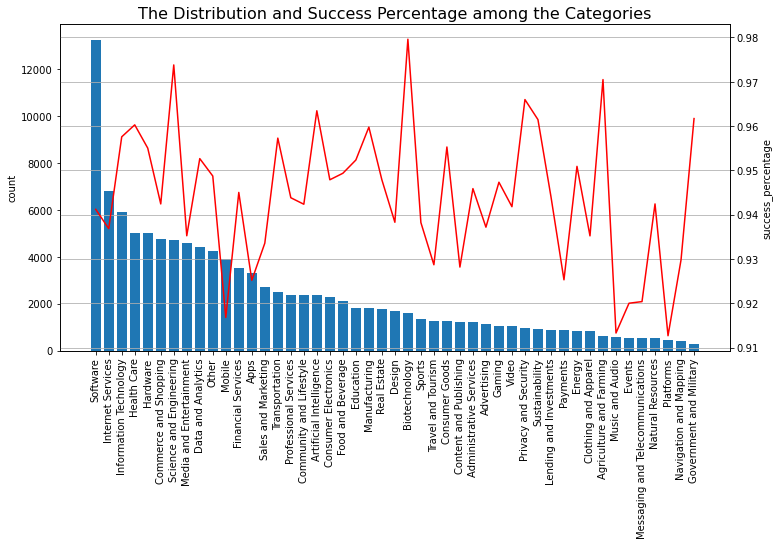

In [404]:
def calculate_success_per(column_name, condition):
    df = org3.loc[org3.loc[:,column_name] == condition]
    fi = df.groupby(['status'],as_index=False)['status'].agg({'cnt':'count'})
#     print(fi)
    result = fi.iat[1,1] /(fi.iat[1,1] +  fi.iat[0,1])
    total = fi.iat[1,1] + fi.iat[0,1]
    return result, total

results = []
totals = []
for category in list_category:
    result,total = calculate_success_per('categ_1_hot_'+ category, 1)
#     print(category,result,total)
    totals.append(total)
    results.append(result)
    
summay={"category" : list_category,
       "count" : totals,
      'succes_percentage': results}
summ = pd.DataFrame(summay)
summ = summ.sort_values(by=['count'],ascending=False)

x = summ['category'].tolist()
y1 = summ['count'].tolist()
y2 = summ['succes_percentage'].tolist()
import matplotlib.pyplot as plt
import numpy as np
 
fig,ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()         
ax1.bar(x,y1)
ax2.plot(x,y2,'r')
ax2.grid()
ax1.set_title('The Distribution and Success Percentage among the Categories',fontsize=16)
ax1.set_ylabel('count')  
ax2.set_ylabel('success_percentage')
ax1.set_xticklabels(x, rotation = 90)
plt.savefig('category.png')

2 0.9651485471759713
3 0.9736547085201793
1 0.9284137684185408
4 0.9793577981651376


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


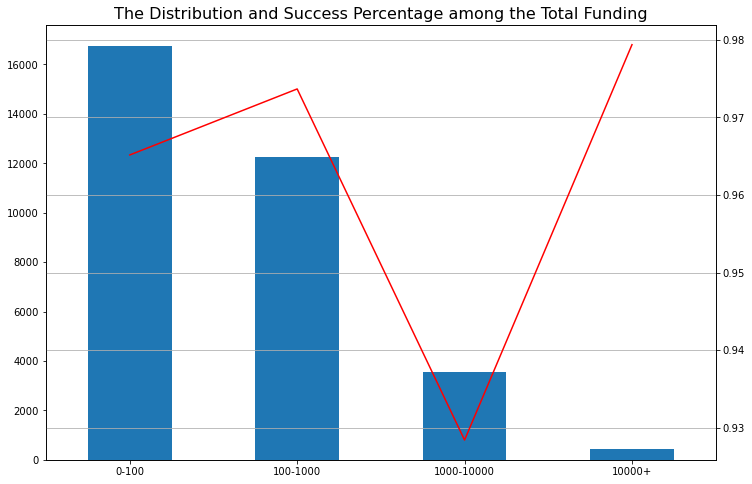

In [405]:
x=[2,3,1,4]
x2= ['2','3','1','4']
y=[]
for i in x:
    
    result, total = calculate_success_per('total_funding_usd', i)
    print(i,result)
    y.append(result)

fig,ax1 = plt.subplots(figsize=(12,8))
ax1 = org3['total_funding_usd'].value_counts().plot.bar()
ax2 = ax1.twinx()  
ax2.plot(x2,y,'r')
ax1.set_title('The Distribution and Success Percentage among the Total Funding',fontsize=16)
ax1.set_xticklabels(['0-100','100-1000','1000-10000','10000+'], rotation = 0)
ax2.grid()
plt.savefig('Total Funding.png')